### Import Libraries

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Data Preprocessing
1. Loading Dataset
1. Delete Missing Values
2. Delete Duplicate Rows
3. Separate Numerical and Categorical Features 


**Loading Dataset**

In [2]:
# Read the CSV file into a DataFrame
df = pd.read_csv('SpotifyDataSet.csv')

In [3]:
# Display the first row of the DataFrame
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [4]:
# Get the shape of the DataFrame
df.shape

(114000, 21)

In [5]:
# Get summary statistics
df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [6]:
# Get information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [7]:
# Delete the first column "Unnamed"
df.drop(df.columns[0], axis=1, inplace=True)
df.shape

(114000, 20)

**Delete Missing Values**

In [8]:
# Check the sum of null values in each column
df.isna().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [9]:
# Drop rows with null values
df=df.dropna()

**Delete Duplicate Values**

In [10]:
# Drop duplicate rows
df=df.drop_duplicates()

In [11]:
# Get the shape of the DataFrame after dropping duplicates
df.shape

(113549, 20)

In [12]:
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


**Separate Numerical and Categorical Features**


In [13]:
# Select numerical features
feature_numerical=[feature for feature in df.columns if df[feature].dtype!='O']
feature_numerical

['popularity',
 'duration_ms',
 'explicit',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature']

In [14]:
# Select discrete features
feature_discrete_numerical=[feature for feature in feature_numerical if df[feature].nunique()<50]
feature_discrete_numerical

['explicit', 'key', 'mode', 'time_signature']

In [15]:
# Select countinous features
features_continuous_numerical=[features for features in feature_numerical if features not in feature_discrete_numerical]
features_continuous_numerical

['popularity',
 'duration_ms',
 'danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo']

In [16]:
# Select categorical features
feature_categorical=[feature for feature in df.columns if df[feature].dtype=='O']
feature_categorical

['track_id', 'artists', 'album_name', 'track_name', 'track_genre']

### Data Visualization
1. Analyze Single features
    -  	Histogram (countinuos numerical)
    -   Countplot (categorical)
2.	Analyze Multiple features
    -	Discrete vs. popularity
    -   Heatmap Features


**Analyze Single features**

In [17]:
# Distribution Plots:
def my_histplot(df, col, ax):
    sns.histplot(df[col], bins=25, kde=True, ax=ax)
    ax.set_title(f'Histogram Plot of {col}')
    ax.set_xlabel(col)  

# Categorical Plots:
def my_countplot(df, col, ax):
    sns.countplot(x=df[col], ax=ax)
    ax.set_title(f'Count Plot of {col}')
    ax.tick_params(axis='x', rotation=90)

def my_boxplot(df, col, ax):
    sns.boxplot(df[col], ax=ax)
    ax.set_title(f'Boxplot of {col}')

# Matrix Plots:
def my_heatmap(df, size=None):
    if size: plt.figure(figsize=size)
    sns.heatmap(df.corr(), annot=True, fmt=".1f", cmap='Blues', annot_kws={"size": 12})
    plt.title('Correlation Heatmap')
    plt.show()

In [18]:
# Define plot charts for single feature
def plot_charts_grid_single_feature(df, plot_func, size=(10, 4), n_col=2):
    num_cols = len(df.columns)
    n_rows = (num_cols + n_col - 1) // n_col
    fig, axes = plt.subplots(n_rows, n_col, figsize=(size[0]*n_col, size[1]*n_rows))
    axes = axes.flatten()

    for i, (label, ax) in enumerate(zip(df.columns, axes)):
        plot_func(df, label, ax)
        ax.axis('on') 
    
    for j in range(num_cols, n_rows * n_col):
        axes[j].axis('off') 
    
    plt.tight_layout()
    plt.show()

Distribution of countinous numerical features


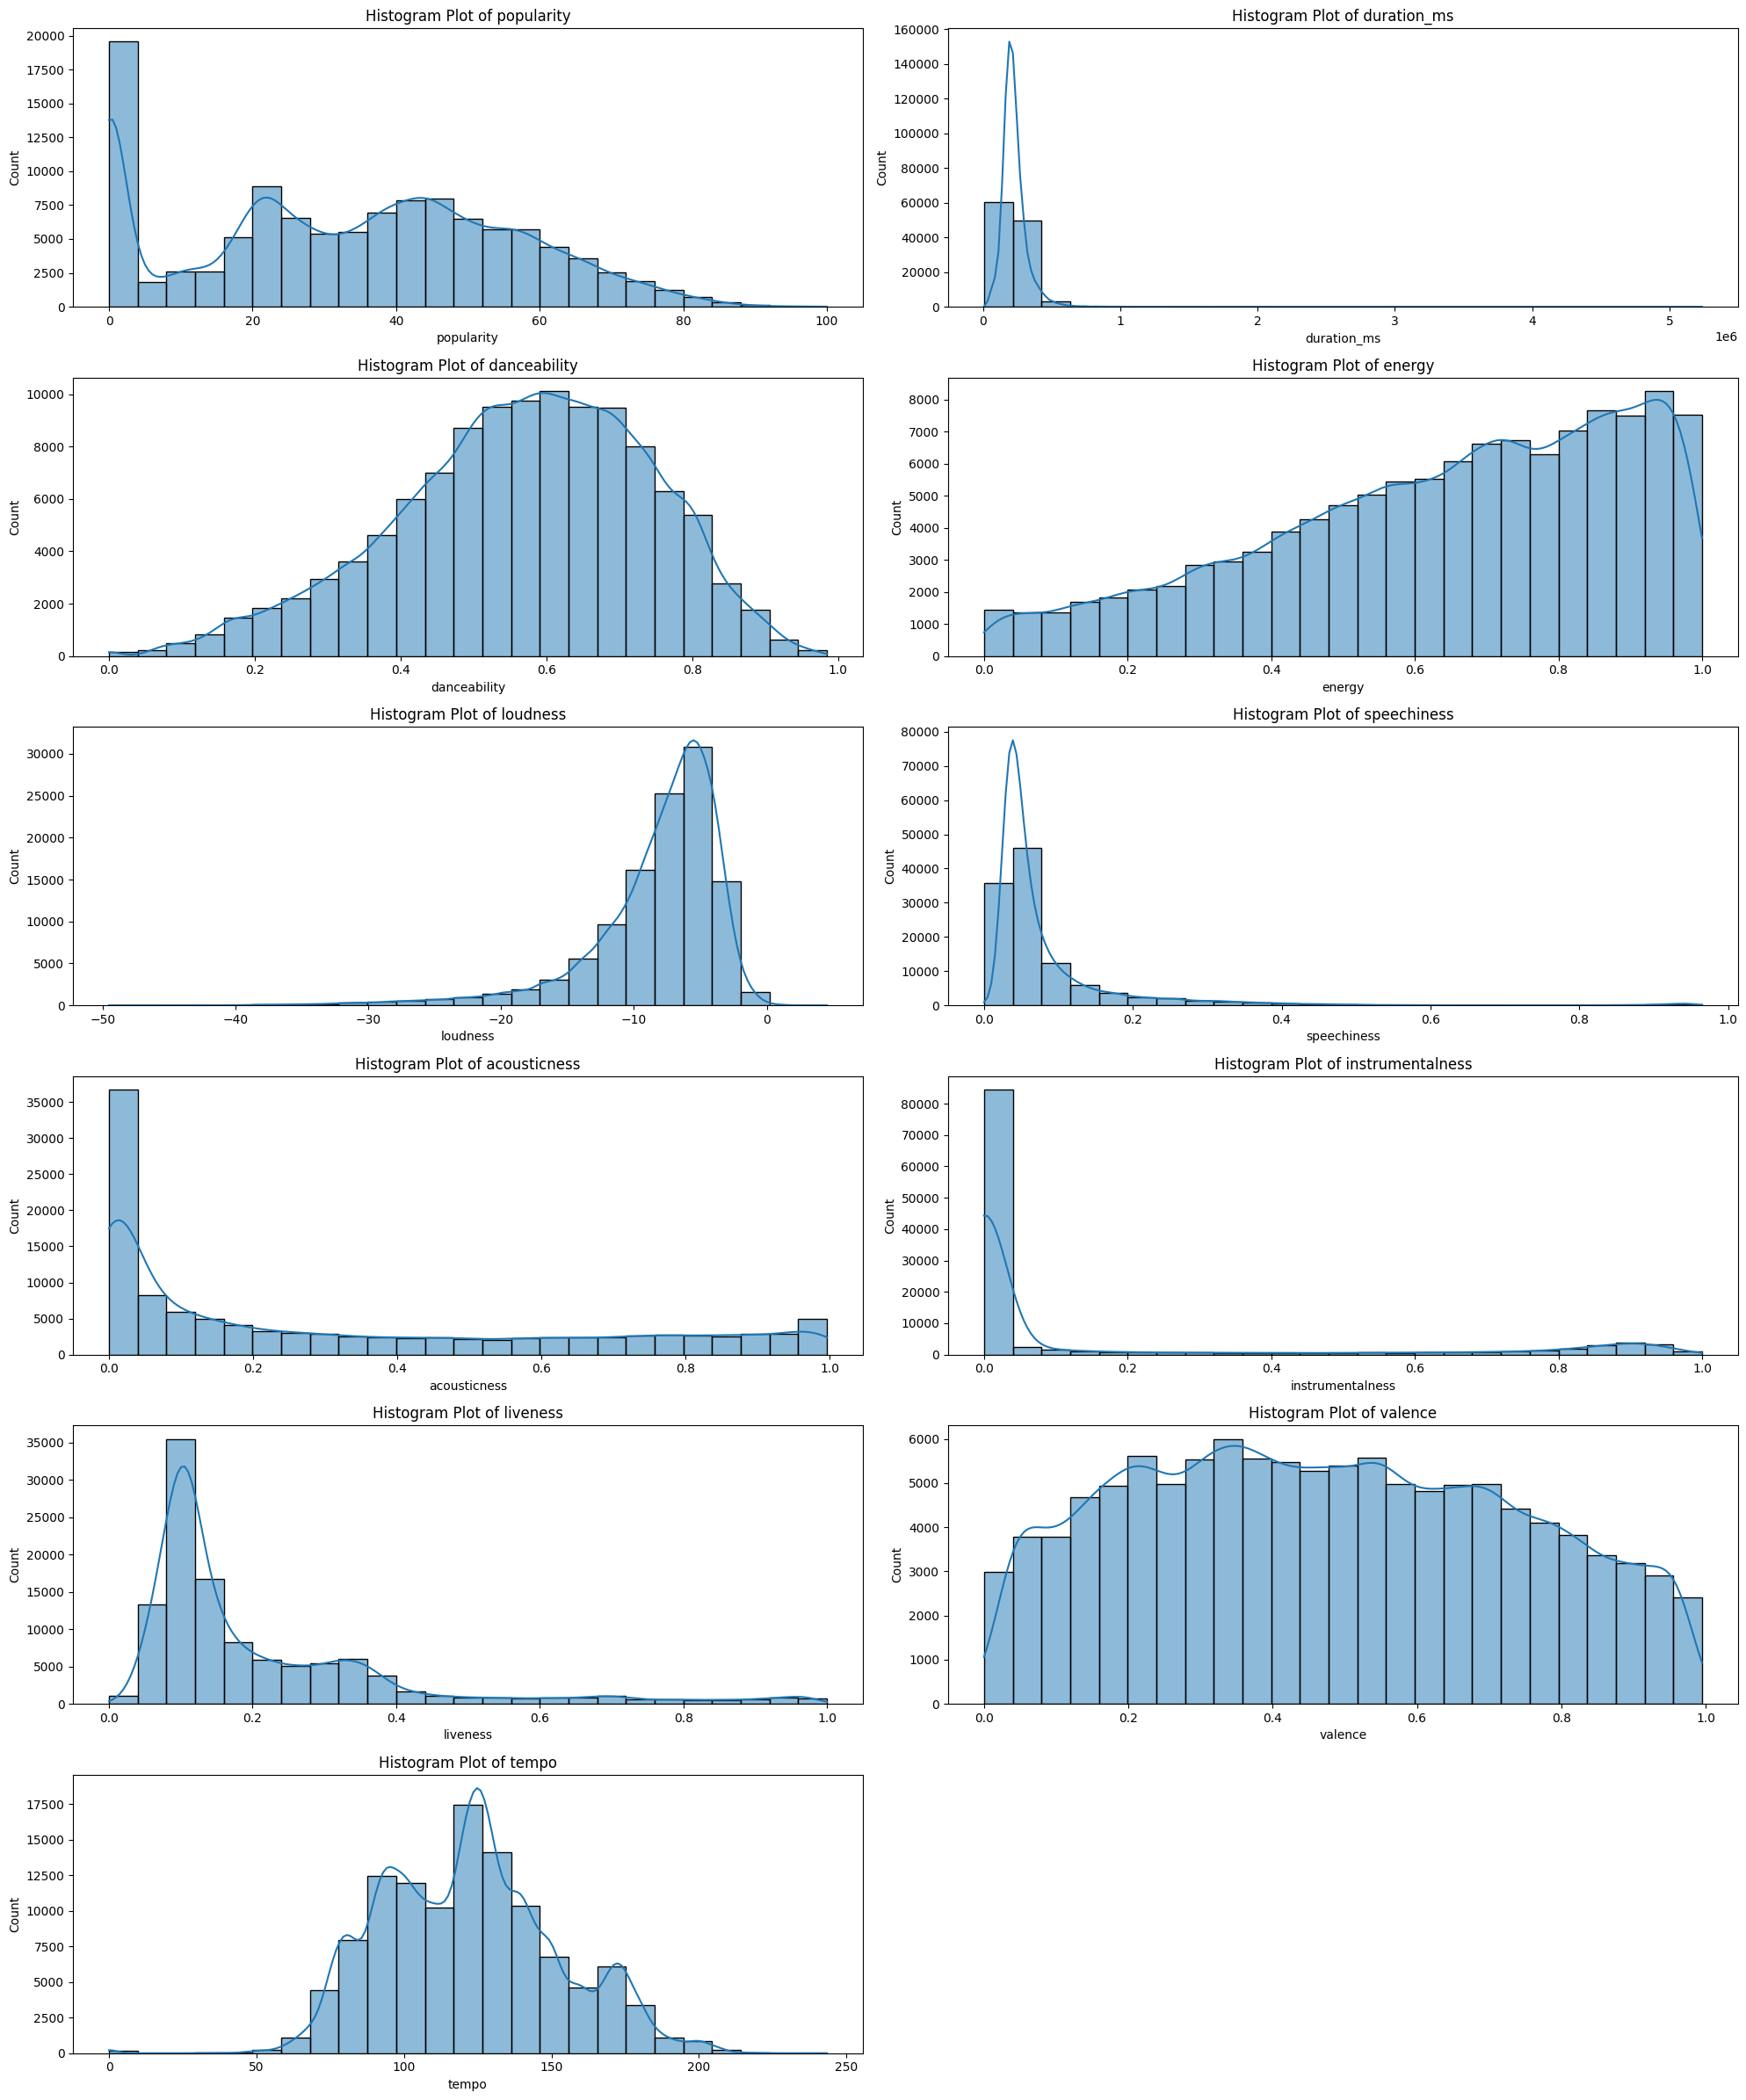

In [19]:
# Draw Distribution of Continuous Numerical Features
print("Distribution of countinous numerical features")
plot_charts_grid_single_feature(df[features_continuous_numerical], my_histplot, n_col=2)

Distribution of discrete numerical features


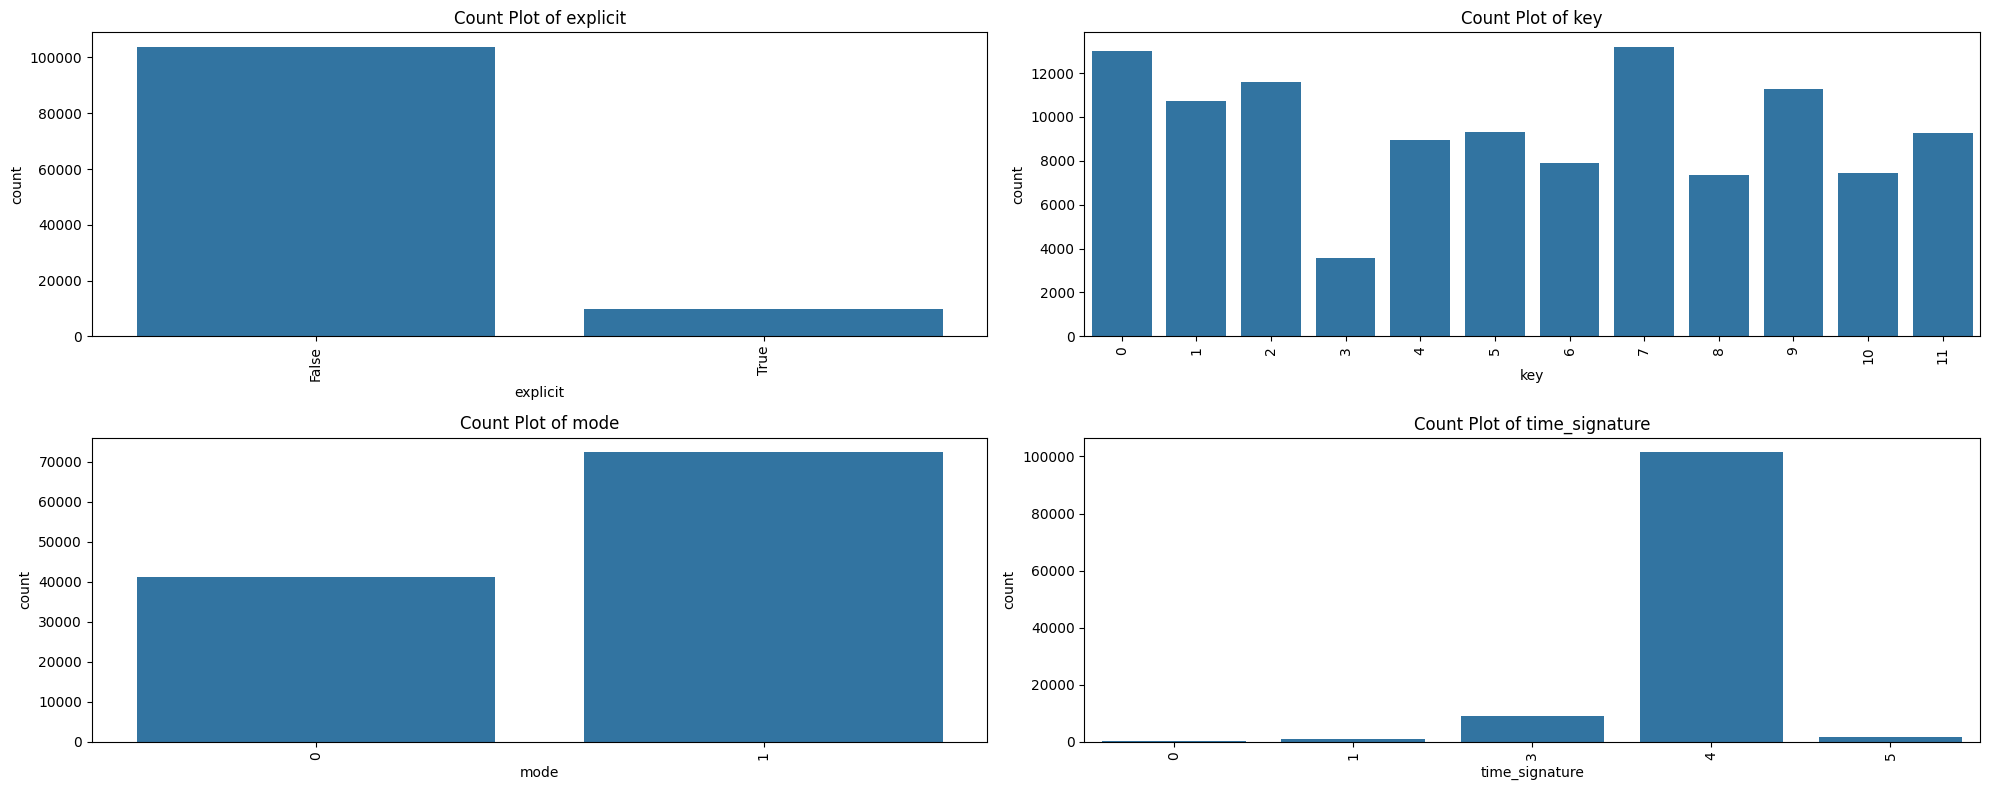

In [20]:
# Draw Distribution of Discrete Numerical Features
print("Distribution of discrete numerical features")
plot_charts_grid_single_feature(df[feature_discrete_numerical], my_countplot)

**Analyze Multiple features**

In [21]:
# Define plot charts for multiple features
def plot_charts_grid_multiple_feature(df, columns, plot_func, y_col, size=(10, 4), n_col=2):
    n_rows = (len(columns) + n_col-1) // n_col
    fig, axes = plt.subplots(n_rows, n_col, figsize=(size[0]*n_col, size[1]*n_rows))
    axes = axes.flatten()
    
    for i, label in enumerate(columns):
        plot_func(x=label, y=y_col, ax=axes[i], data=df)
        axes[i].set_xlabel(label)

    for j in range(i+1, n_rows*n_col):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()

Discrete Numerical Feature vs Popularity


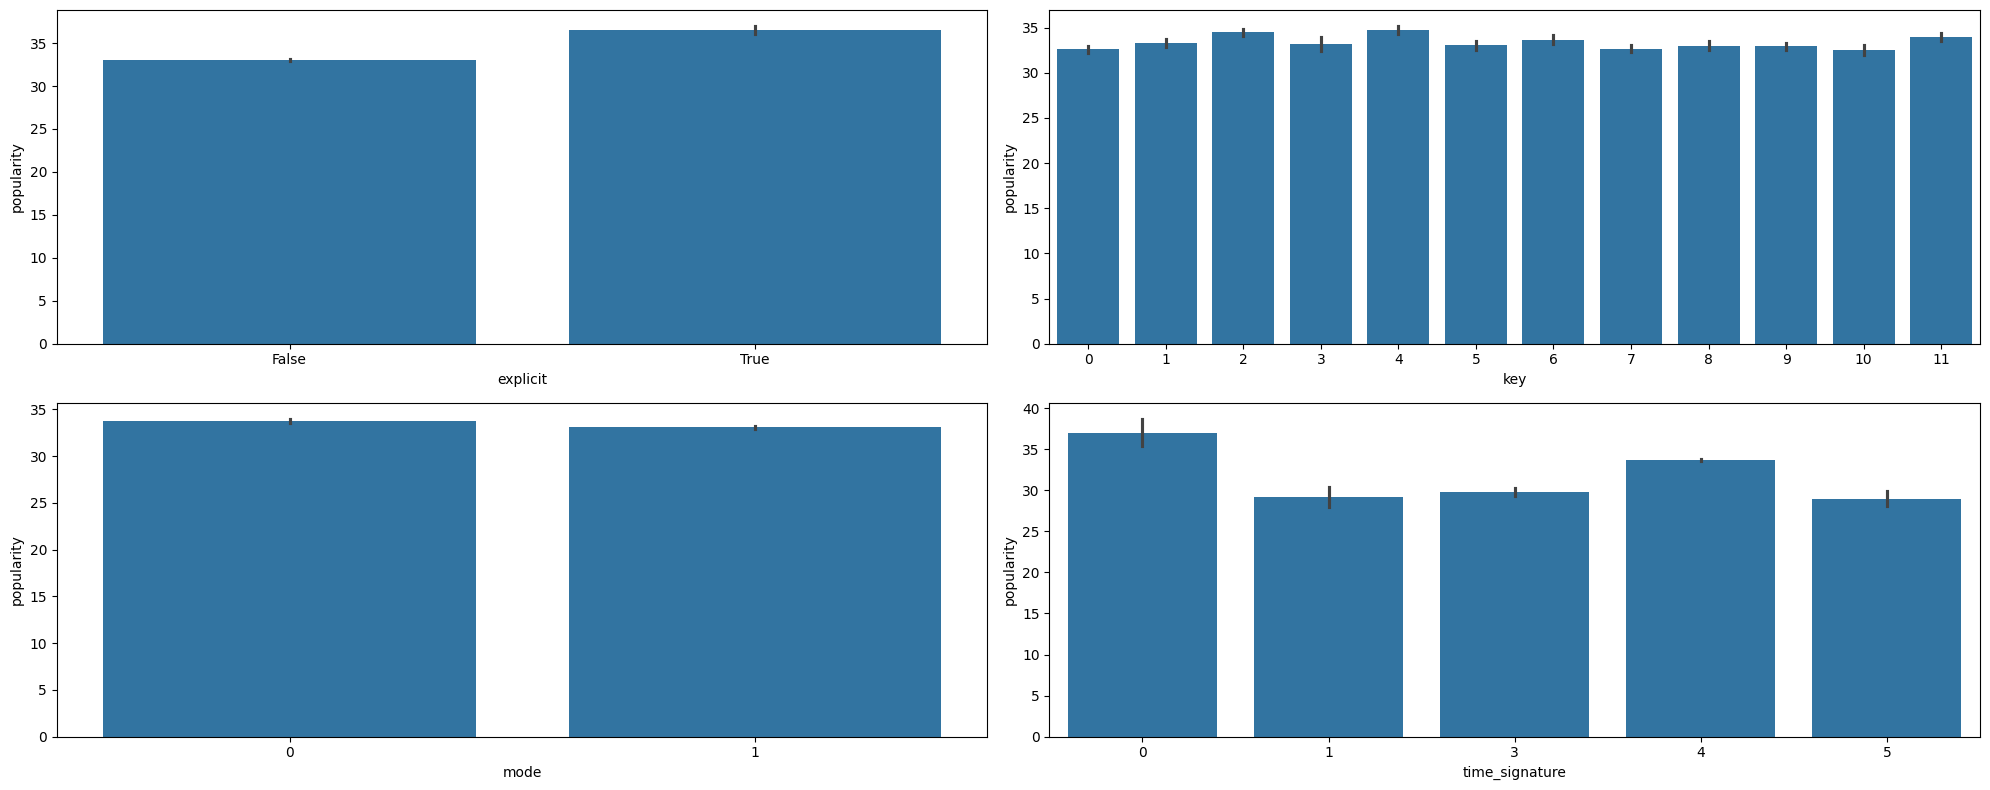

In [22]:
# Draw discrete features vs popularity correlation
print("Discrete Numerical Feature vs Popularity")
plot_charts_grid_multiple_feature(df, feature_discrete_numerical, sns.barplot, y_col='popularity')

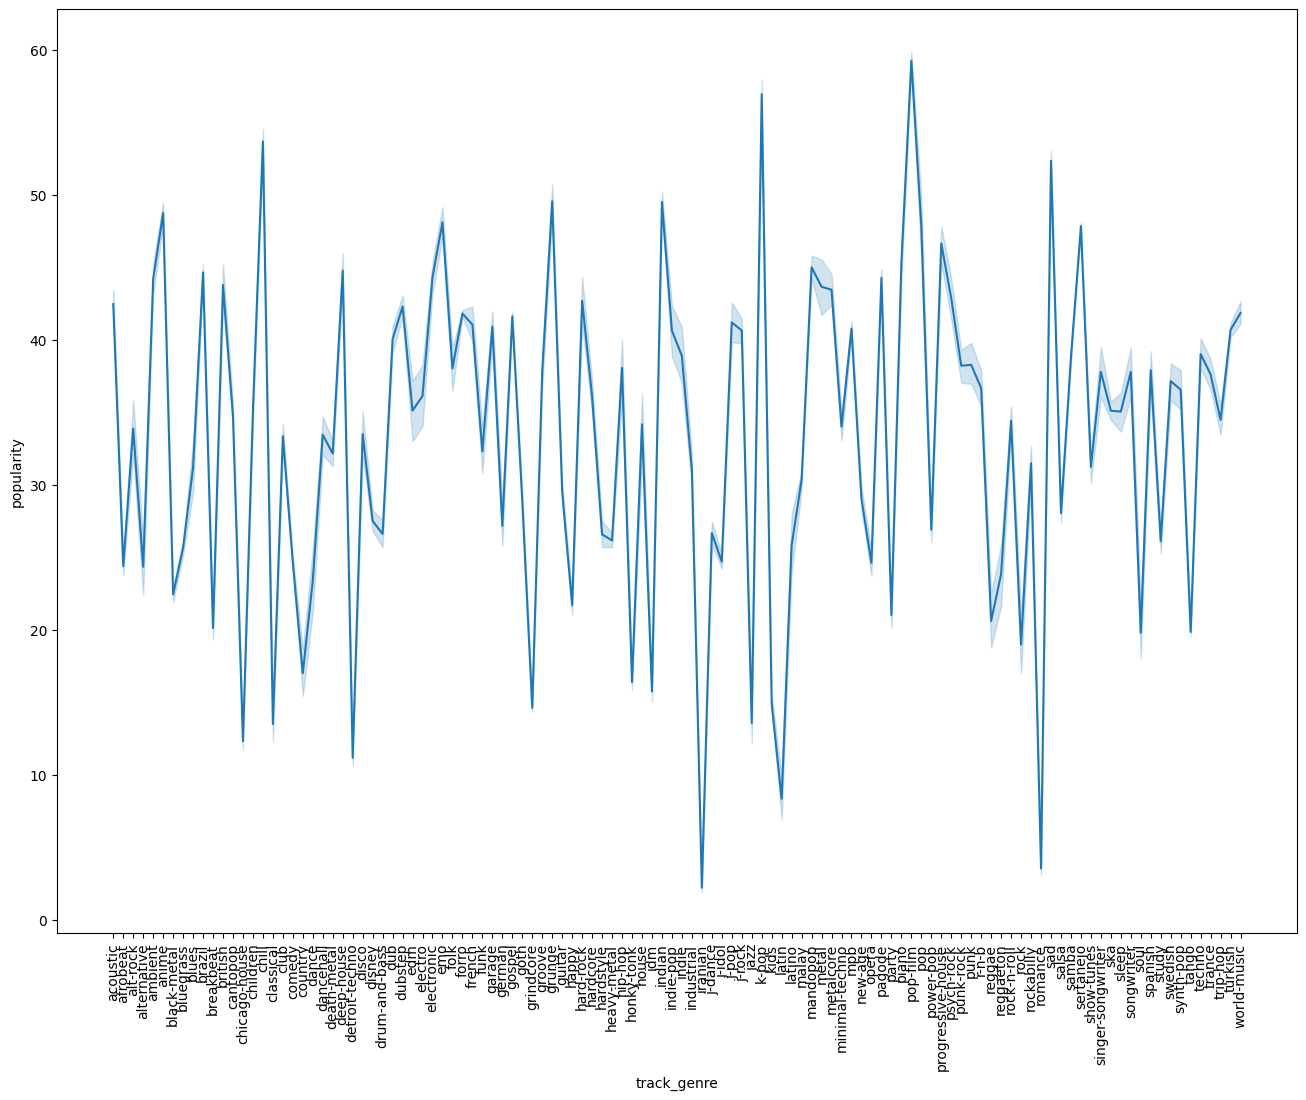

In [23]:
# Draw plot of track_genre vs popularity correlation
plt.figure(figsize=(16,12))
sns.lineplot(x='track_genre', y='popularity', data=df)
plt.xticks(rotation=90)
plt.show()

Heatmap Numerical Features


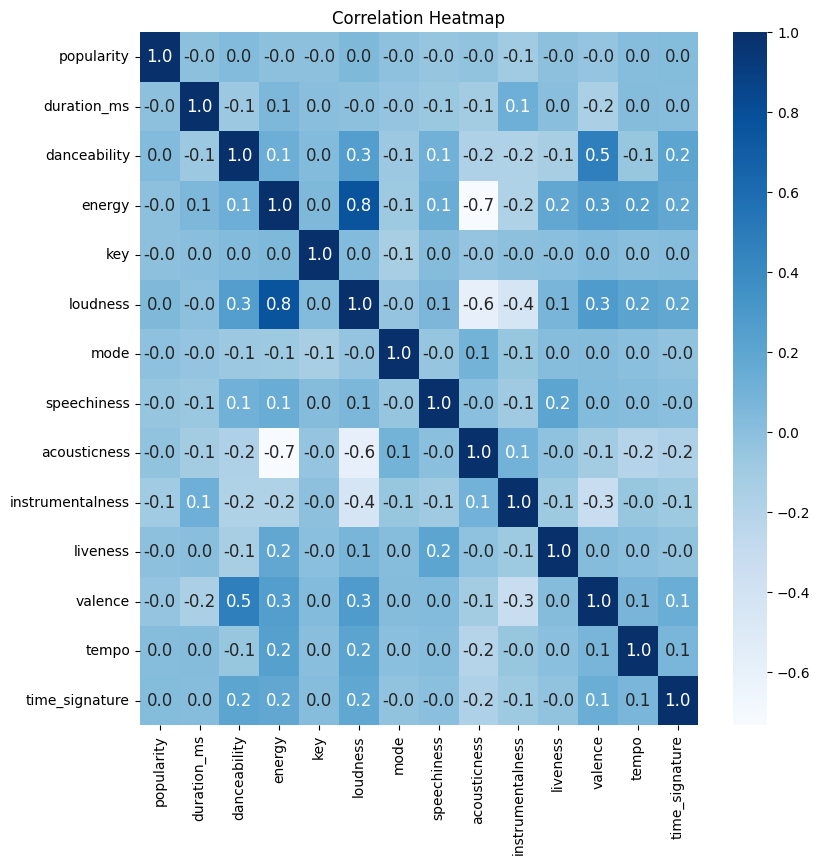

In [24]:
# Print heatmap plot of numerical features
print("Heatmap Numerical Features")
n_numeric_cols = len(df.select_dtypes(include=['int64', 'float64']).columns)//3*2
my_heatmap(df.select_dtypes(include=['int64', 'float64']), size=(n_numeric_cols+1, n_numeric_cols+1))

### Feature Engineering and Transformation
1.	Outliers detection
2.	Skewness of continuous features
4.	Encoding categorical features
5.	Feature scaling


**Outliers detection**

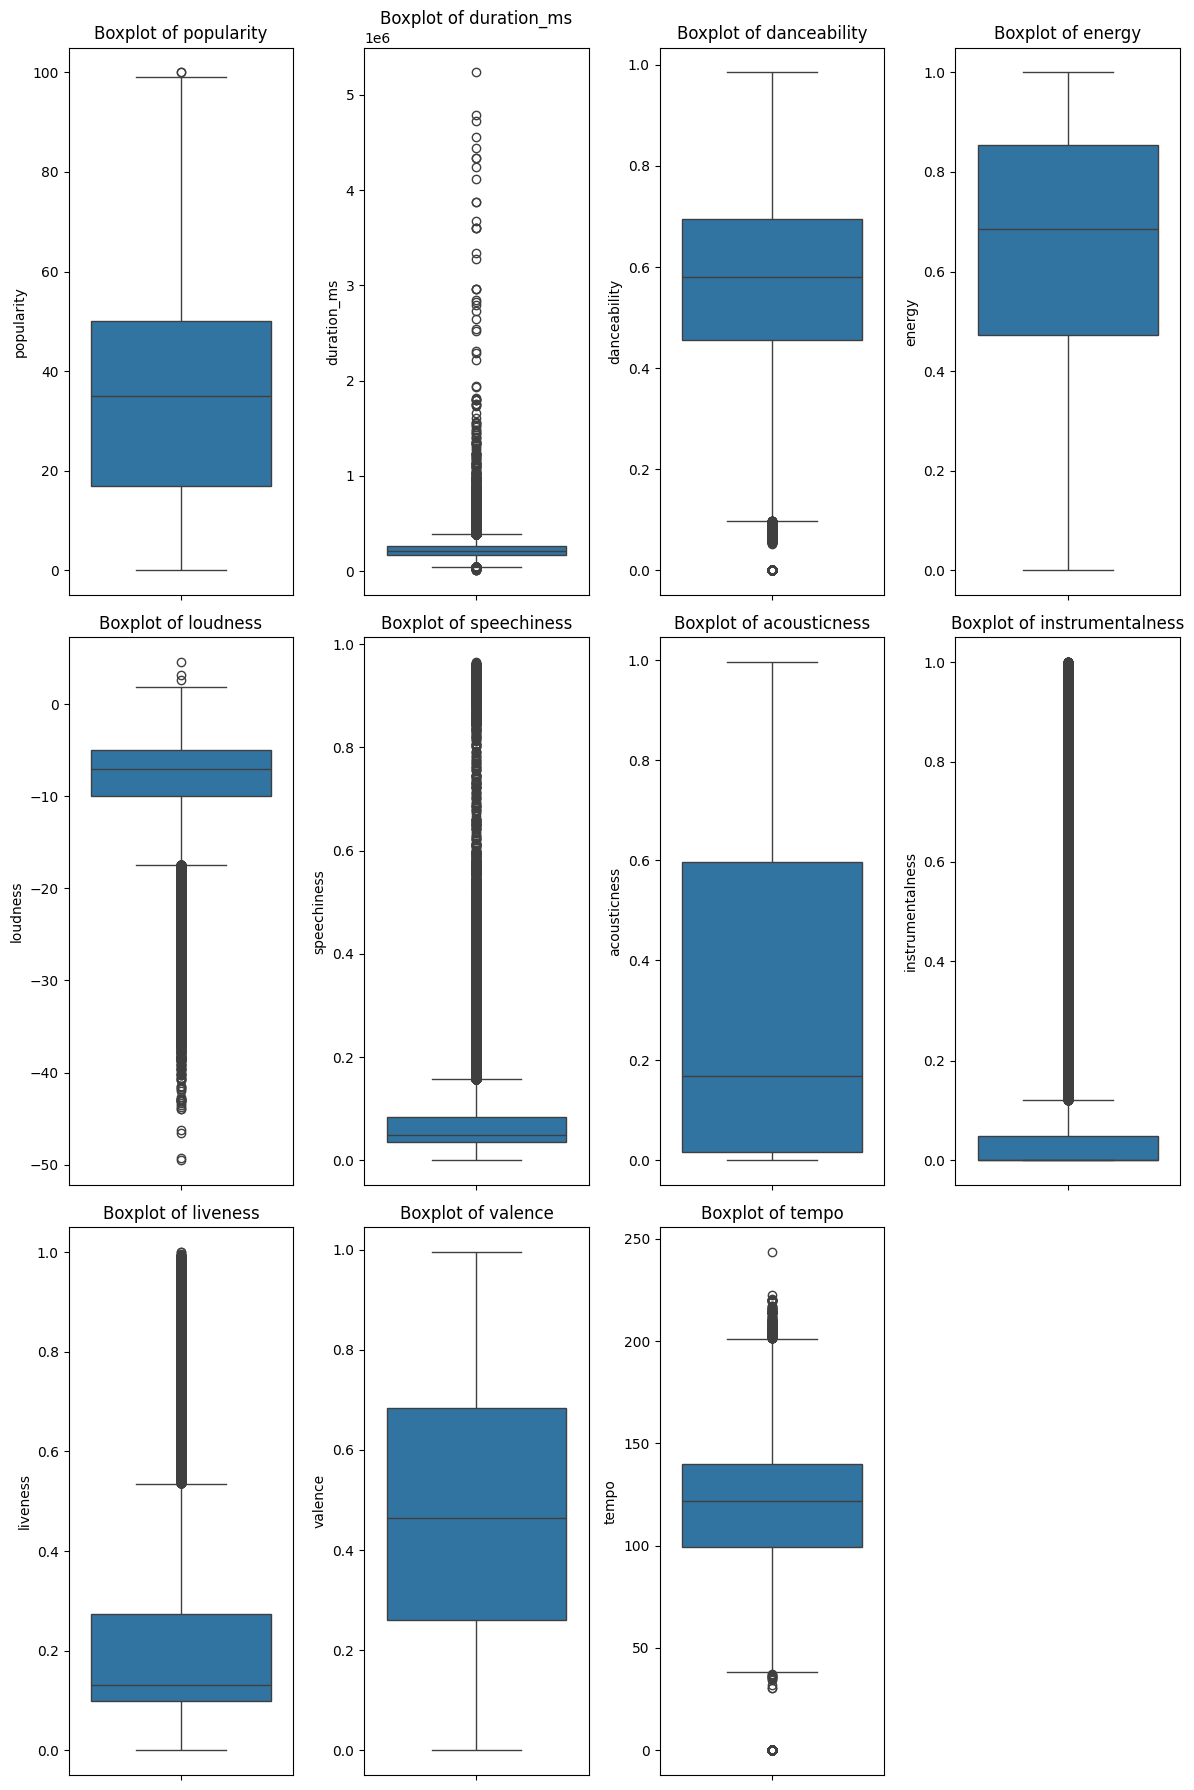

In [25]:
# Draw boxplot to detect outliers
plot_charts_grid_single_feature(df[features_continuous_numerical], my_boxplot, size=(3, 6), n_col=4)

**Skewness Countinuos Feature**

In [26]:
# Import libraries for statistics and skewness
from scipy import stats
from scipy.stats import skew

In [27]:
# Initialize dataset copies for different transformations
dataset_log=df.copy()
dataset_reci=df.copy()
dataset_sqrt=df.copy()
dataset_expo=df.copy()

In [28]:
# Apply different transformations to the continuous features
for feature in features_continuous_numerical:
    dataset_log[feature]=np.log(dataset_log[feature]+1)
    dataset_reci[feature]=1/(dataset_reci[feature]+1)
    dataset_sqrt[feature]=dataset_sqrt[feature]**(1/2)
    dataset_expo[feature]=dataset_expo[feature]**(1/5)

C:\Users\Roberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [29]:
# Print skewness for each transformation
for feature in features_continuous_numerical:
    print(feature.upper(), 'original skewness:', skew(df[feature]))
    print('logarithmic:', skew(dataset_log[feature]))
    print('reciprocal: ', skew(dataset_reci[feature]))
    print('square-root:', skew(dataset_sqrt[feature]))
    print('exponential:', skew(dataset_expo[feature]))
    print("--------------------------------------------")

POPULARITY original skewness: 0.04222809948109981
logarithmic: -1.3582344590230757
reciprocal:  1.9291529645017076
square-root: -0.8319211861334729
exponential: -1.637182842110766
--------------------------------------------
DURATION_MS original skewness: 10.814434004933338
logarithmic: -0.31958068443270016
reciprocal:  5.062710652230053
square-root: 1.7918392897162523
exponential: 0.3280005714079256
--------------------------------------------
DANCEABILITY original skewness: -0.4003991295600715
logarithmic: -0.7033043814280042
reciprocal:  1.0423257462450115
square-root: -1.078209424796711
exponential: -3.4689794311862756
--------------------------------------------
ENERGY original skewness: -0.598542182428158
logarithmic: -0.8969101507400357
reciprocal:  1.2350332519840488
square-root: -1.2697363940462225
exponential: -2.2008891779513866
--------------------------------------------
LOUDNESS original skewness: -2.0133133823721505
logarithmic: nan
reciprocal:  44.341700995068464
square

In [30]:
# Apply specific transformations to selected features
df['acousticness']=df['acousticness']**(1/2)
df[['speechiness','instrumentalness','liveness','duration_ms']]=df[['speechiness','instrumentalness','liveness','duration_ms']]**(1/5)

In [31]:
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,11.819435,False,0.676,0.4610,1,-6.746,0,0.677746,0.179444,0.063221,0.814285,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,10.839073,False,0.420,0.1660,1,-17.235,1,0.597730,0.961249,0.088923,0.632214,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,11.608733,False,0.438,0.3590,0,-9.734,1,0.561269,0.458258,0.000000,0.651084,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,11.509103,False,0.266,0.0596,0,-18.515,1,0.515206,0.951315,0.147871,0.666983,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,11.473778,False,0.618,0.4430,2,-9.681,1,0.554878,0.684836,0.000000,0.607730,0.167,119.949,4,acoustic


Distribution of countinous numerical features


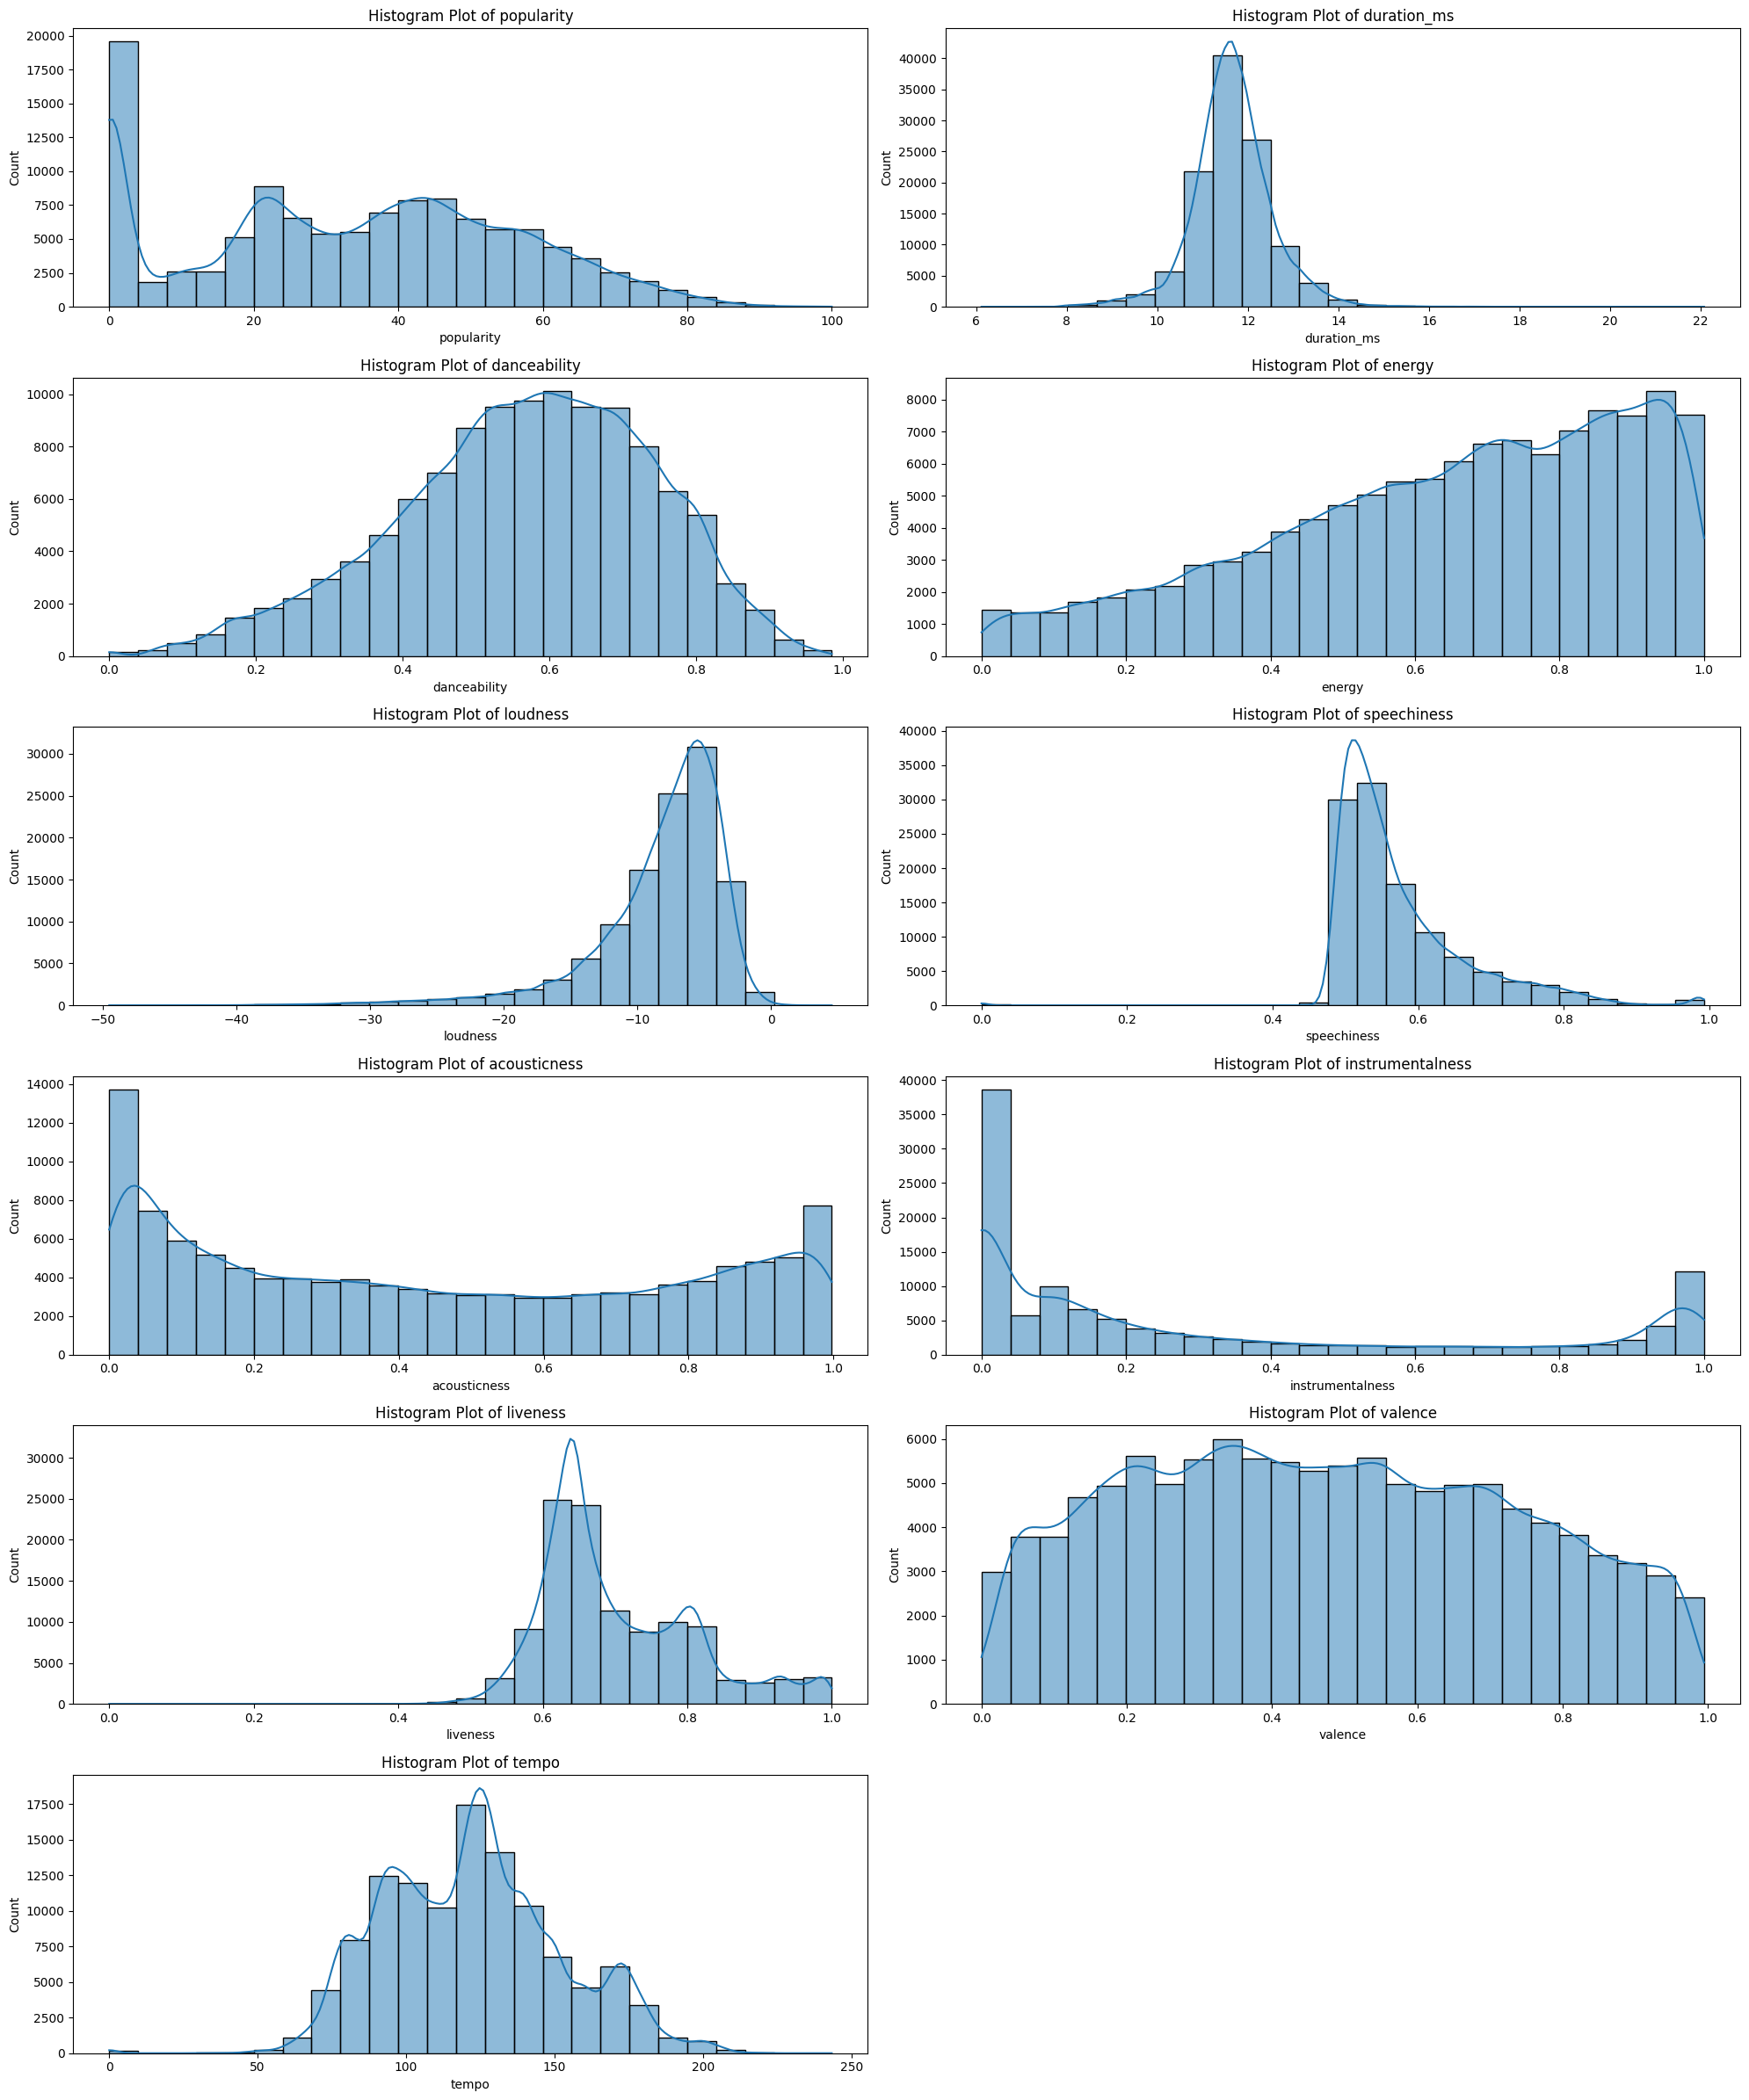

In [32]:
# Draw Distribution of Continuous Numerical Features
print("Distribution of countinous numerical features")
plot_charts_grid_single_feature(df[features_continuous_numerical], my_histplot, n_col=2)

**Encoding Categorical Features**

In [33]:
# Print Categorical features
print(f"Categorical Features : {feature_categorical}")

Categorical Features : ['track_id', 'artists', 'album_name', 'track_name', 'track_genre']


In [34]:
# Detect missing values in categorical features
for feature in feature_categorical:
    print(feature,': {}, missing values {}'.format(df[feature].nunique(), df[feature].isna().sum()))

track_id : 89740, missing values 0
artists : 31437, missing values 0
album_name : 46589, missing values 0
track_name : 73608, missing values 0
track_genre : 114, missing values 0


In [35]:
pip install category_encoders

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [36]:
# Import Encoders
import category_encoders as ce

In [37]:
# Apply BaseNEncoder to categorical features
encoder1 = ce.BaseNEncoder(cols=['track_genre', 'album_name', 'track_name', 'artists'], base=10, return_df=True)
data = encoder1.fit_transform(df)
data.head()

,track_id,artists_0,artists_1,artists_2,artists_3,artists_4,album_name_0,album_name_1,album_name_2,album_name_3,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre_0,track_genre_1,track_genre_2
0,5SuOikwiRyPMVoIQDJUgSV,0,0,0,0,1,0,0,0,0,...,0.677746,0.179444,0.063221,0.814285,0.715,87.917,4,0,0,1
1,4qPNDBW1i3p13qLCt0Ki3A,0,0,0,0,2,0,0,0,0,...,0.597730,0.961249,0.088923,0.632214,0.267,77.489,4,0,0,1
2,1iJBSr7s7jYXzM8EGcbK5b,0,0,0,0,3,0,0,0,0,...,0.561269,0.458258,0.000000,0.651084,0.120,76.332,4,0,0,1
3,6lfxq3CG4xtTiEg7opyCyx,0,0,0,0,4,0,0,0,0,...,0.515206,0.951315,0.147871,0.666983,0.143,181.740,3,0,0,1
4,5vjLSffimiIP26QG5WcN2K,0,0,0,0,5,0,0,0,0,...,0.554878,0.684836,0.000000,0.607730,0.167,119.949,4,0,0,1


**Feature Scaling**

In [38]:
# Convert boolean to binary in the explicit column
data['explicit']=np.where(data['explicit']==False, 0, 1)

In [39]:
# Print numerical features
feature_numerical

['popularity',
 'duration_ms',
 'explicit',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature']

In [40]:
# Import StandardScaler and fit it to the data
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
features_scaling=[feature for feature in feature_numerical if feature not in ['popularity','mode','explicit']]
scaler.fit(data[features_scaling])
scaler.transform(data[features_scaling])

array([[ 0.1853255 ,  0.62839367, -0.72132759, ...,  0.92898358,
        -1.14299362,  0.22165951],
       [-0.92488754, -0.84789057, -1.89638213, ..., -0.79939532,
        -1.4909088 ,  0.22165951],
       [-0.053284  , -0.74408933, -1.12761763, ..., -1.36651965,
        -1.52951044,  0.22165951],
       ...,
       [ 0.62849465,  0.35735711, -1.2471147 , ...,  1.03700726,
         0.34038354,  0.22165951],
       [ 0.75284102,  0.11515423, -0.54208198, ..., -0.23612898,
         0.4598918 ,  0.22165951],
       [ 0.31240644, -0.23661663, -0.61776346, ...,  0.90197766,
        -1.43389048,  0.22165951]])

In [41]:
# Replace original data with scaled data
data_to_replace=pd.DataFrame(scaler.transform(data[features_scaling]), columns=features_scaling)
data_to_replace.head()

,duration_ms,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0.185325,0.628394,-0.721328,-1.210476,0.298800,1.101557,-0.815926,-0.672445,1.078285,0.928984,-1.142994,0.221660
1,-0.924888,-0.847891,-1.896382,-1.210476,-1.794228,0.234607,1.533645,-0.600612,-0.653979,-0.799395,-1.490909,0.221660
2,-0.053284,-0.744089,-1.127618,-1.491364,-0.297440,-0.160432,0.021997,-0.849140,-0.474446,-1.366520,-1.529510,0.221660
3,-0.166111,-1.735968,-2.320198,-1.491364,-2.049645,-0.659502,1.503789,-0.435859,-0.323181,-1.277786,1.987275,-2.092538
4,-0.206115,0.293923,-0.793026,-0.929587,-0.286864,-0.229681,0.702936,-0.849140,-0.886924,-1.185194,-0.074292,0.221660


In [42]:
# Replace scaling data
for feature in features_scaling:
    data[feature]=data_to_replace[feature].values

In [43]:
# Check for null values
data.isna().sum()

track_id            0
artists_0           0
artists_1           0
artists_2           0
artists_3           0
artists_4           0
album_name_0        0
album_name_1        0
album_name_2        0
album_name_3        0
album_name_4        0
track_name_0        0
track_name_1        0
track_name_2        0
track_name_3        0
track_name_4        0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre_0       0
track_genre_1       0
track_genre_2       0
dtype: int64

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113549 entries, 0 to 113999
Data columns (total 34 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113549 non-null  object 
 1   artists_0         113549 non-null  int64  
 2   artists_1         113549 non-null  int64  
 3   artists_2         113549 non-null  int64  
 4   artists_3         113549 non-null  int64  
 5   artists_4         113549 non-null  int64  
 6   album_name_0      113549 non-null  int64  
 7   album_name_1      113549 non-null  int64  
 8   album_name_2      113549 non-null  int64  
 9   album_name_3      113549 non-null  int64  
 10  album_name_4      113549 non-null  int64  
 11  track_name_0      113549 non-null  int64  
 12  track_name_1      113549 non-null  int64  
 13  track_name_2      113549 non-null  int64  
 14  track_name_3      113549 non-null  int64  
 15  track_name_4      113549 non-null  int64  
 16  popularity        113549 

In [45]:
data.head()

,track_id,artists_0,artists_1,artists_2,artists_3,artists_4,album_name_0,album_name_1,album_name_2,album_name_3,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre_0,track_genre_1,track_genre_2
0,5SuOikwiRyPMVoIQDJUgSV,0,0,0,0,1,0,0,0,0,...,1.101557,-0.815926,-0.672445,1.078285,0.928984,-1.142994,0.221660,0,0,1
1,4qPNDBW1i3p13qLCt0Ki3A,0,0,0,0,2,0,0,0,0,...,0.234607,1.533645,-0.600612,-0.653979,-0.799395,-1.490909,0.221660,0,0,1
2,1iJBSr7s7jYXzM8EGcbK5b,0,0,0,0,3,0,0,0,0,...,-0.160432,0.021997,-0.849140,-0.474446,-1.366520,-1.529510,0.221660,0,0,1
3,6lfxq3CG4xtTiEg7opyCyx,0,0,0,0,4,0,0,0,0,...,-0.659502,1.503789,-0.435859,-0.323181,-1.277786,1.987275,-2.092538,0,0,1
4,5vjLSffimiIP26QG5WcN2K,0,0,0,0,5,0,0,0,0,...,-0.229681,0.702936,-0.849140,-0.886924,-1.185194,-0.074292,0.221660,0,0,1


### Feature Selection

In [46]:
# Define features and target
X=data.drop(['popularity','track_id'], axis=1)
y=data['popularity']

In [47]:
X.head()

,artists_0,artists_1,artists_2,artists_3,artists_4,album_name_0,album_name_1,album_name_2,album_name_3,album_name_4,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre_0,track_genre_1,track_genre_2
0,0,0,0,0,1,0,0,0,0,1,...,1.101557,-0.815926,-0.672445,1.078285,0.928984,-1.142994,0.221660,0,0,1
1,0,0,0,0,2,0,0,0,0,2,...,0.234607,1.533645,-0.600612,-0.653979,-0.799395,-1.490909,0.221660,0,0,1
2,0,0,0,0,3,0,0,0,0,3,...,-0.160432,0.021997,-0.849140,-0.474446,-1.366520,-1.529510,0.221660,0,0,1
3,0,0,0,0,4,0,0,0,0,4,...,-0.659502,1.503789,-0.435859,-0.323181,-1.277786,1.987275,-2.092538,0,0,1
4,0,0,0,0,5,0,0,0,0,5,...,-0.229681,0.702936,-0.849140,-0.886924,-1.185194,-0.074292,0.221660,0,0,1


In [48]:
# Define numerical features
X_numerical=data[feature_numerical].drop(['popularity'], axis=1)
X_numerical.head()

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0.185325,0,0.628394,-0.721328,-1.210476,0.298800,0,1.101557,-0.815926,-0.672445,1.078285,0.928984,-1.142994,0.221660
1,-0.924888,0,-0.847891,-1.896382,-1.210476,-1.794228,1,0.234607,1.533645,-0.600612,-0.653979,-0.799395,-1.490909,0.221660
2,-0.053284,0,-0.744089,-1.127618,-1.491364,-0.297440,1,-0.160432,0.021997,-0.849140,-0.474446,-1.366520,-1.529510,0.221660
3,-0.166111,0,-1.735968,-2.320198,-1.491364,-2.049645,1,-0.659502,1.503789,-0.435859,-0.323181,-1.277786,1.987275,-2.092538
4,-0.206115,0,0.293923,-0.793026,-0.929587,-0.286864,1,-0.229681,0.702936,-0.849140,-0.886924,-1.185194,-0.074292,0.221660


In [49]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split, cross_val_score
X_train_num, X_test_num, y_train_num, y_test_num=train_test_split(X_numerical,y, test_size=0.3, random_state=7)
X_train_all, X_test_all, y_train_all, y_test_all=train_test_split(X,y, test_size=0.3, random_state=7)

In [50]:
# Print shape of sets 
print("Numerical features:")
print("Train:", X_train_num.shape, "Test:", X_test_num.shape)
print("Train labels:", y_train_num.shape, "Test labels:", y_test_num.shape)
print("------------------")
print("All features:")
print("Train:", X_train_all.shape, "Test:", X_test_all.shape)
print("Train labels:", y_train_all.shape, "Test labels:", y_test_all.shape)


Numerical features:
Train: (79484, 14) Test: (34065, 14)
Train labels: (79484,) Test labels: (34065,)
------------------
All features:
Train: (79484, 32) Test: (34065, 32)
Train labels: (79484,) Test labels: (34065,)


### Model Training

In [51]:
# Import regression models
from sklearn.linear_model import Ridge, LinearRegression
from models.ridge import RidgeRegressor
from models.kernel_ridge import KernelRidgeRegressor
from sklearn.kernel_ridge import KernelRidge


In [52]:
# Model initialization
models = {
    "Sklearn Linear Model": LinearRegression(),
    "Sklearn Ridge Model(0.9)": Ridge(.9),
    "Sklearn Ridge Model (0.5)": Ridge(alpha=.5),
    "Sklearn Ridge Model (0.3)": Ridge(alpha=.3),
    "My Ridge Model (0.9)": RidgeRegressor(alpha=.9),
    "My Ridge Model (0.5)": RidgeRegressor(alpha=.5),
    "My Ridge Model (0.3)": RidgeRegressor(alpha=.3)
}

In [53]:
# Plot results function
def plot_results(model, X_train, X_test, y_train, y_test, title):
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    residual = y_test - prediction
    
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.scatter(y_test, prediction)
    plt.subplot(1,2,2)
    sns.distplot(residual, hist=False, kde=True)
    plt.suptitle(title, fontsize=16, y=0.95)
    plt.show()

In [54]:
import warnings
warnings.filterwarnings("ignore")

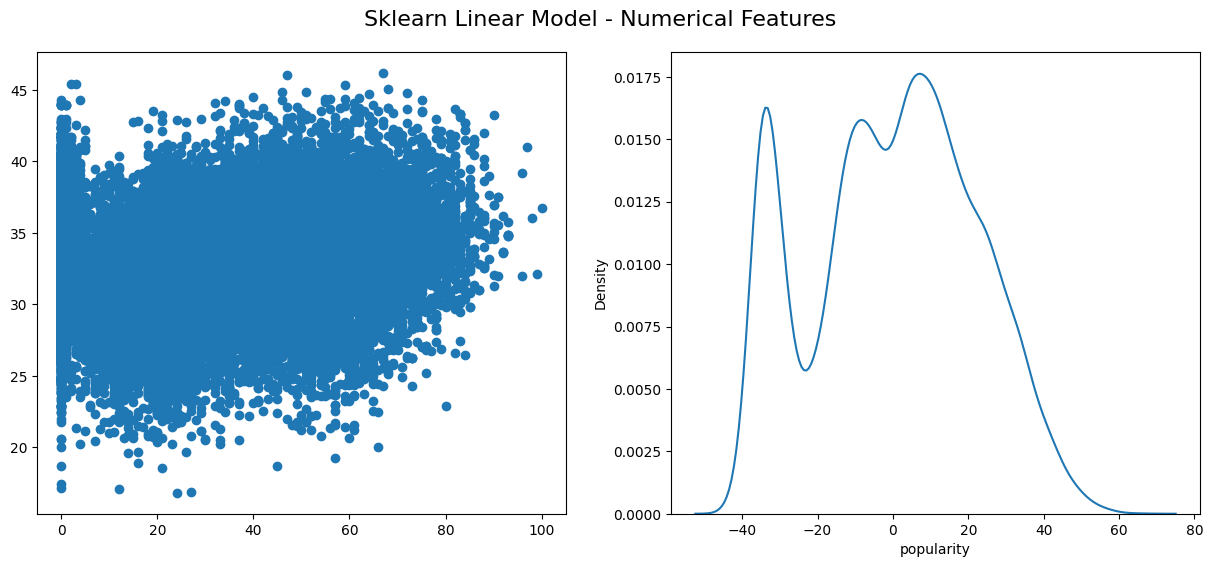

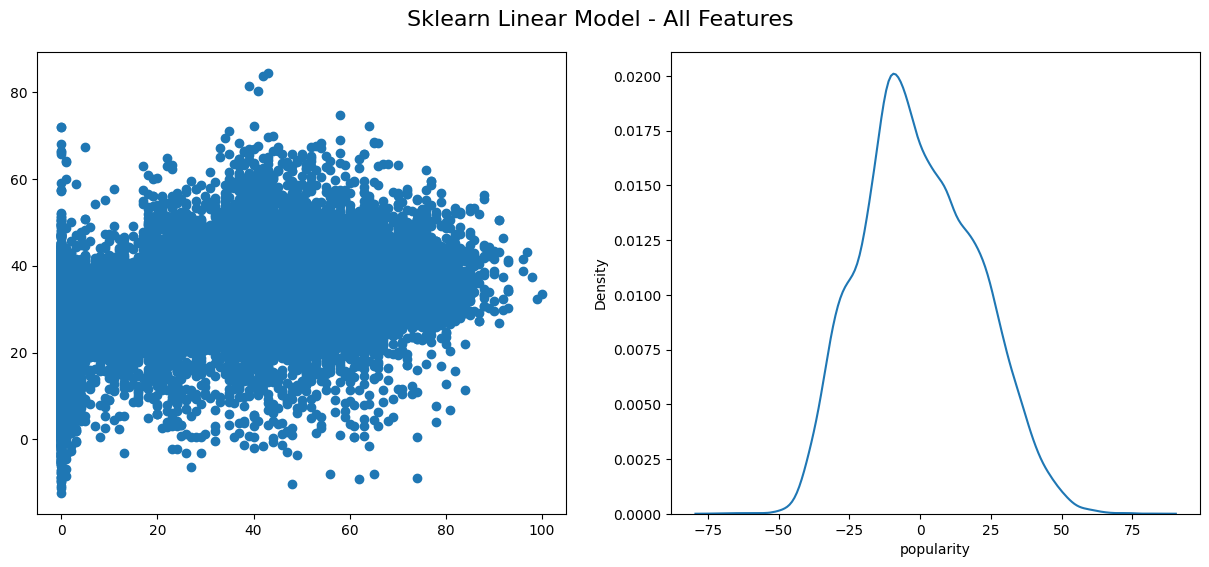

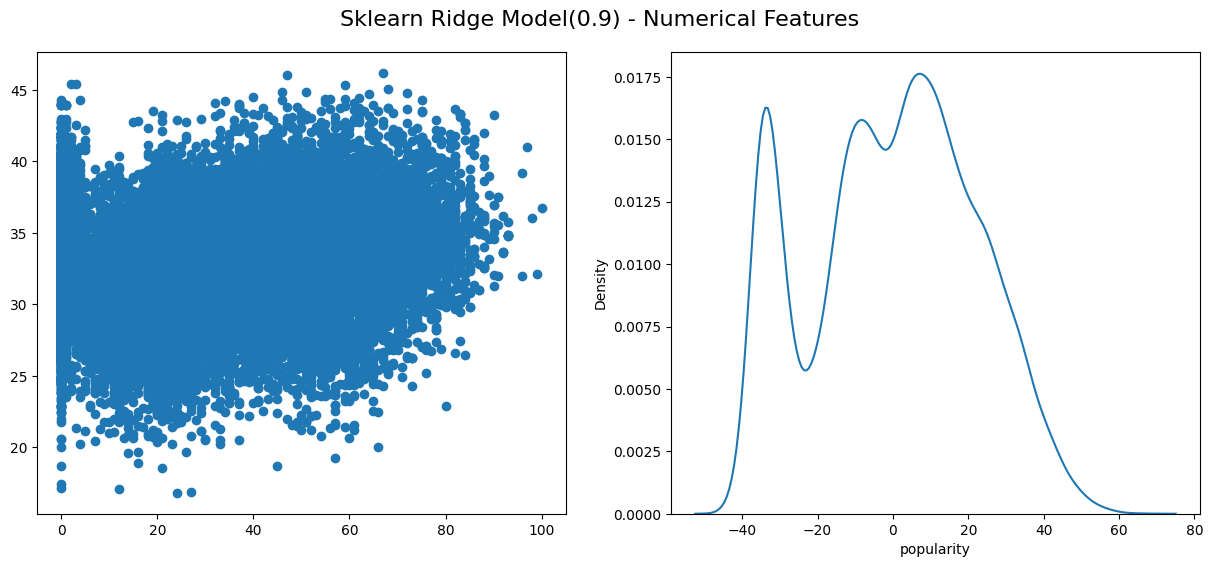

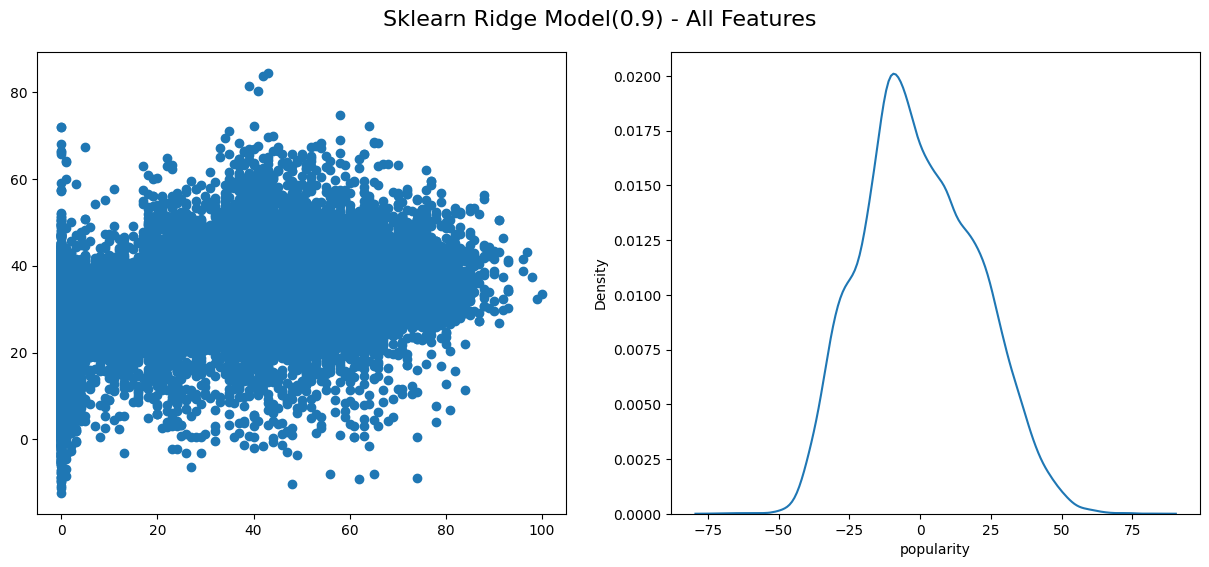

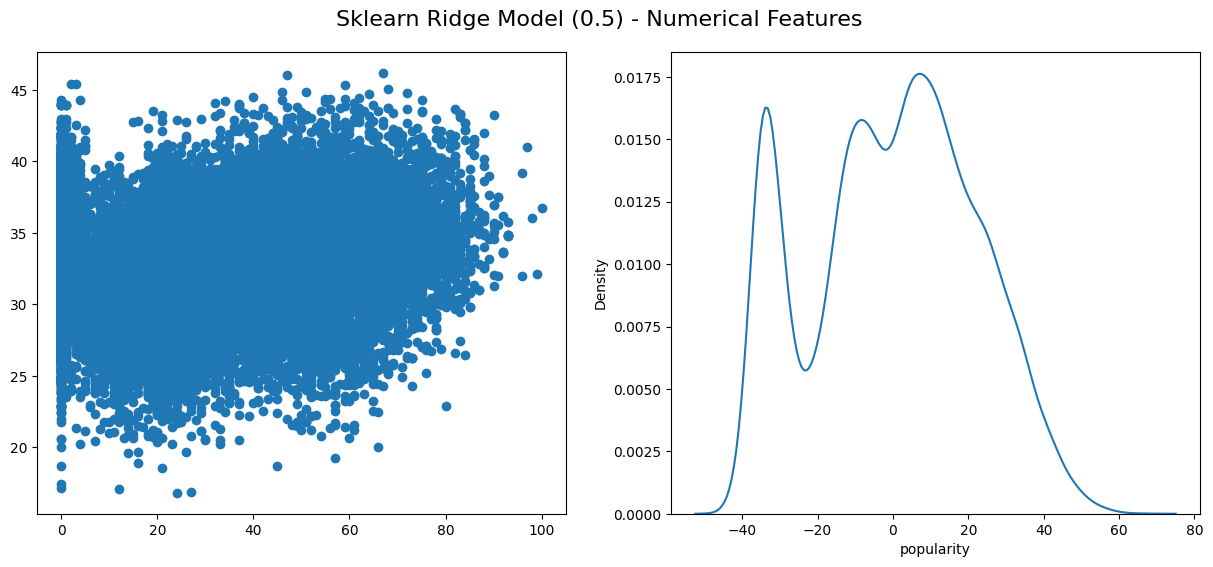

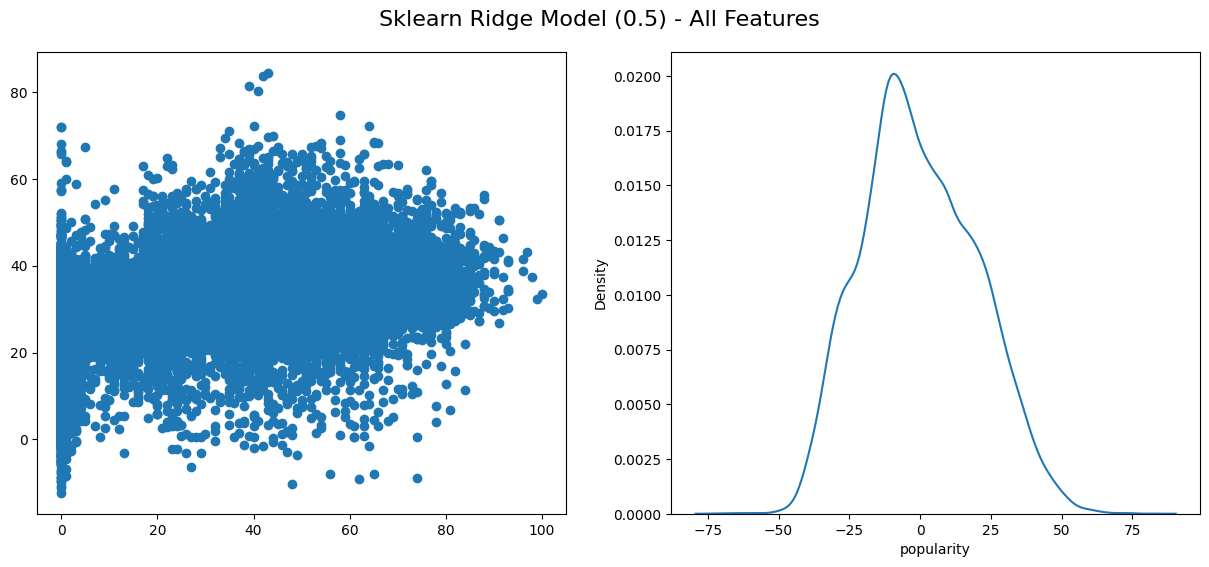

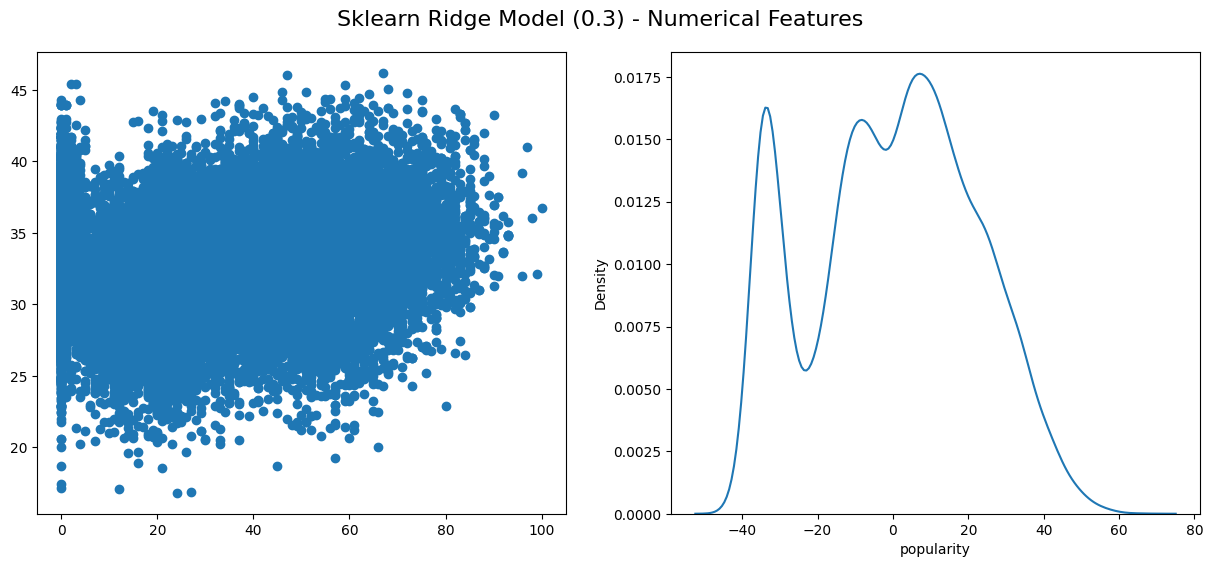

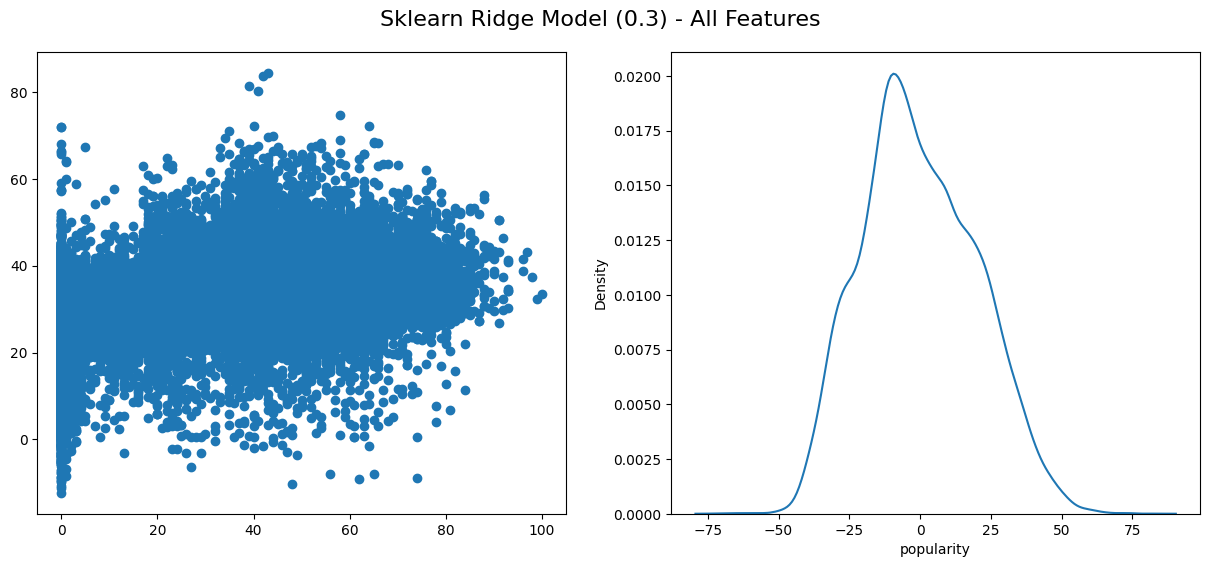

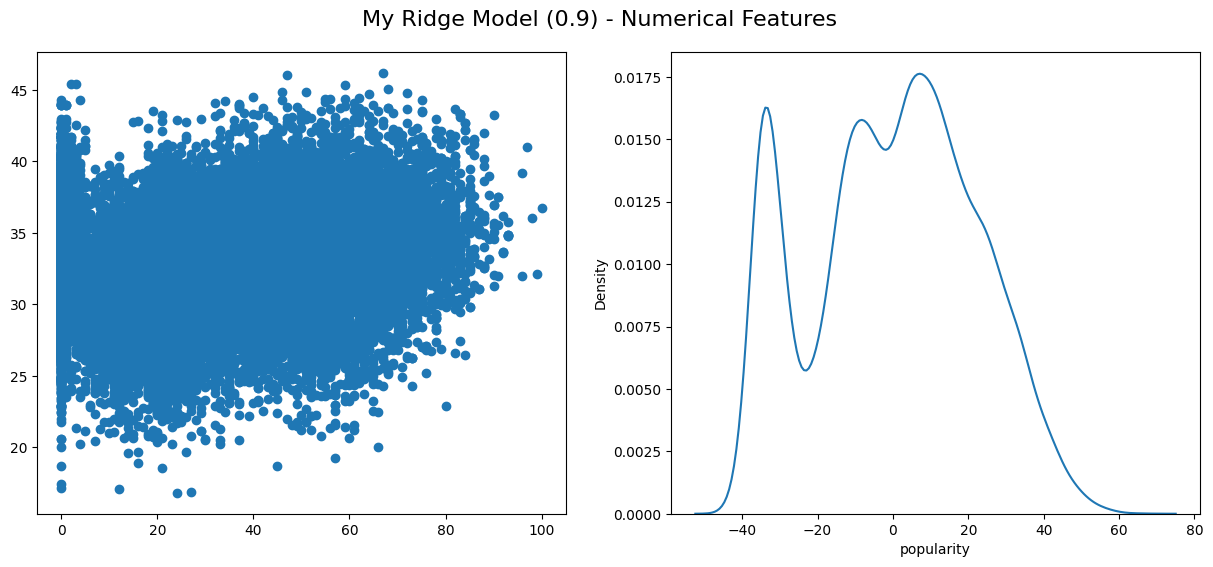

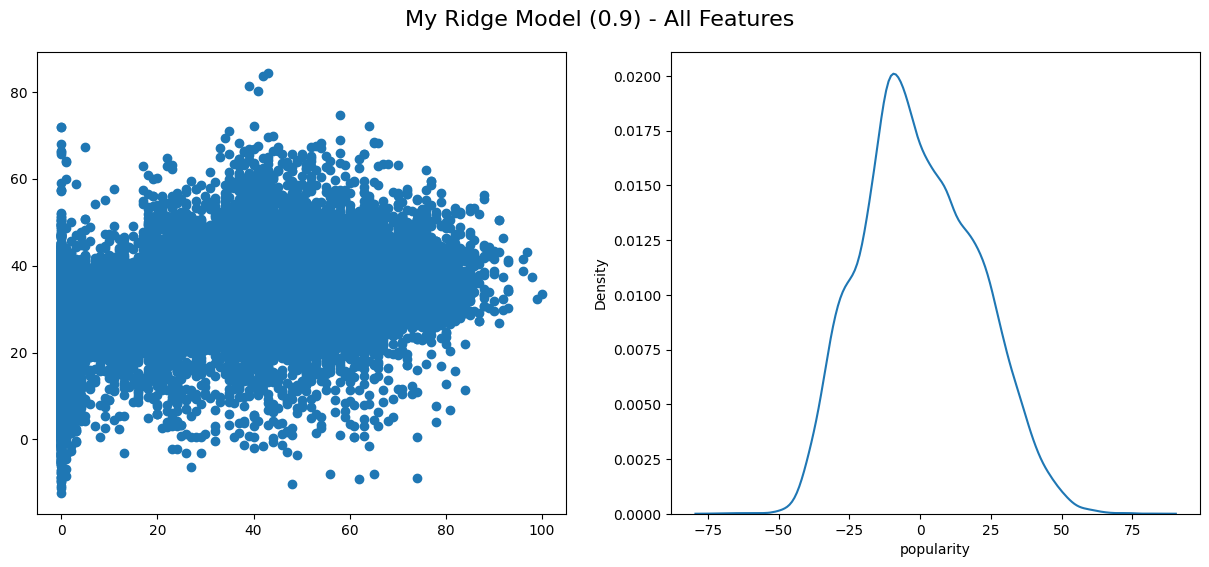

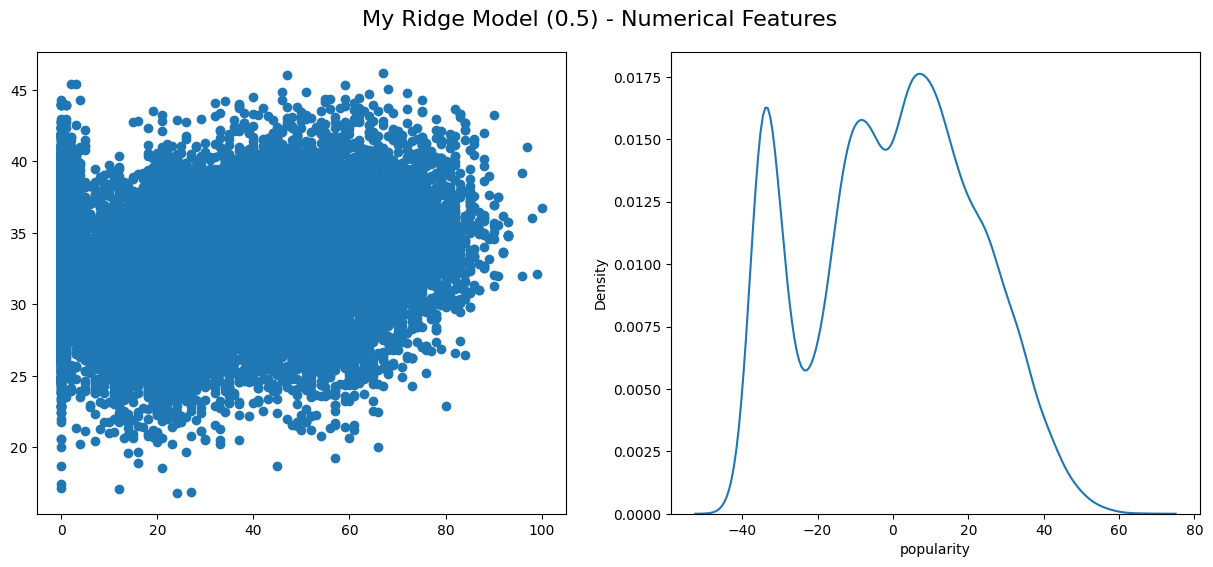

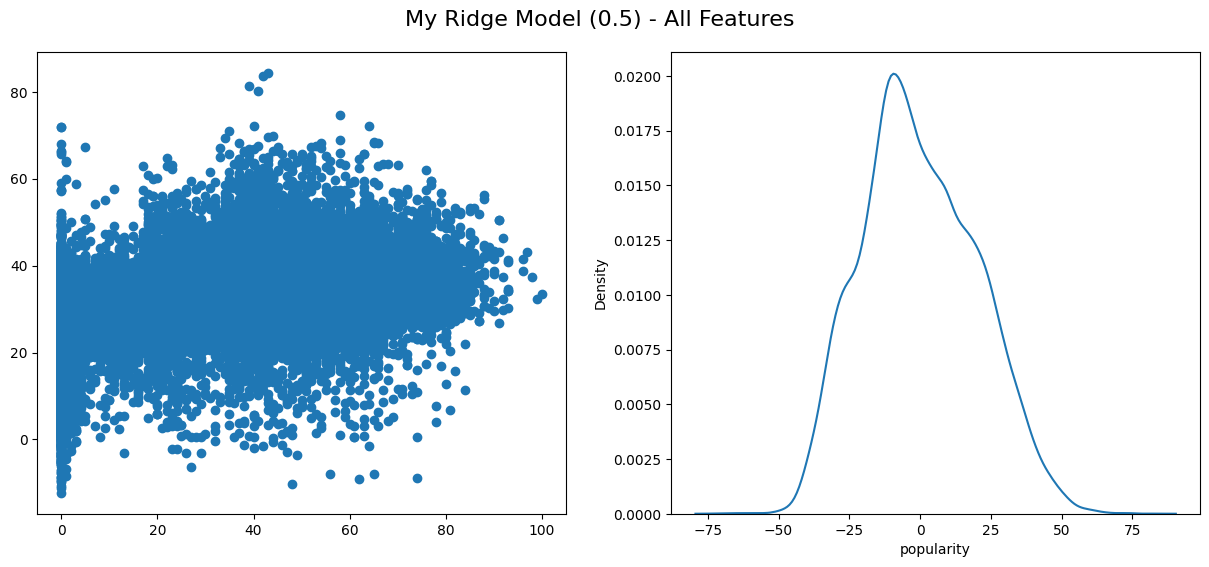

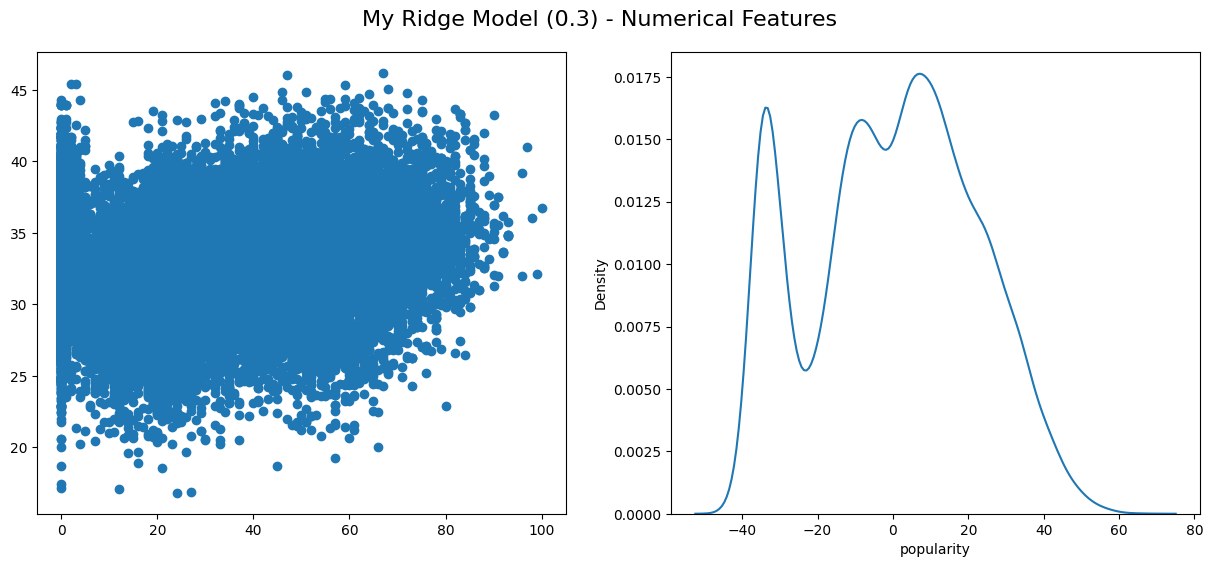

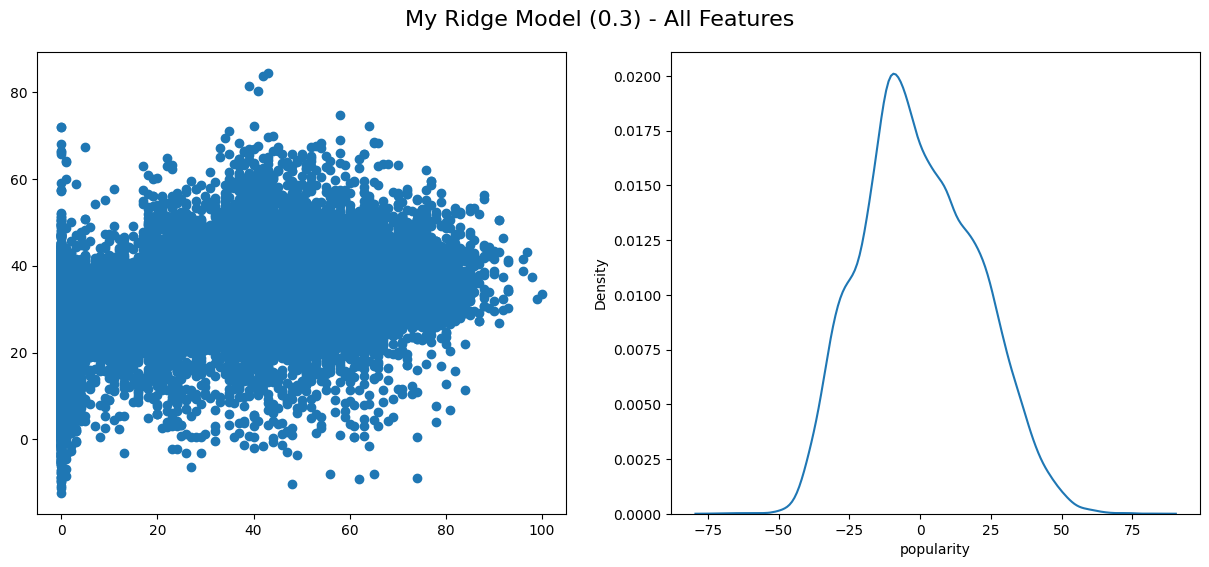

In [55]:
# Plot results for each model
for name, model in models.items():
    plot_results(model, X_train_num, X_test_num, y_train_num, y_test_num, f"{name} - Numerical Features")
    plot_results(model, X_train_all, X_test_all, y_train_all, y_test_all, f"{name} - All Features")

### Performance Metrics

In [56]:
# Import Libraries
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [57]:
# Compute performance metrics function
def compute_statistics(algoname, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    mse = mean_squared_error(y_test, prediction)
    abmse = mean_absolute_error(y_test, prediction)
    score = r2_score(y_test, prediction)
    return algoname, mse, abmse, score

In [58]:
# Compute performance metrics for each model
numerical_results = []
all_results = []
for name, model in models.items():
    numerical_results.append(compute_statistics(f"{name} - Numerical Features", model, X_train_num, y_train_num, X_test_num, y_test_num))
    all_results.append(compute_statistics(f"{name} - All Features", model, X_train_all, y_train_all, X_test_all, y_test_all))

In [59]:
# Convert results to a DataFrame
numerical_metrics = pd.DataFrame(numerical_results, columns=['Model', 'MSE', 'ABMSE', 'R2_score'])
all_metrics = pd.DataFrame(all_results, columns=['Model', 'MSE', 'ABMSE', 'R2_score'])

In [60]:
# Print numerical metrics
numerical_metrics

,Model,MSE,ABMSE,R2_score
0,Sklearn Linear Model - Numerical Features,480.776970,18.258630,0.026337
1,Sklearn Ridge Model(0.9) - Numerical Features,480.777025,18.258638,0.026337
2,Sklearn Ridge Model (0.5) - Numerical Features,480.777000,18.258634,0.026337
3,Sklearn Ridge Model (0.3) - Numerical Features,480.776988,18.258632,0.026337
4,My Ridge Model (0.9) - Numerical Features,480.776980,18.258654,0.026337
5,My Ridge Model (0.5) - Numerical Features,480.776975,18.258643,0.026337
6,My Ridge Model (0.3) - Numerical Features,480.776973,18.258638,0.026337


In [61]:
# Print all metrics
all_metrics

,Model,MSE,ABMSE,R2_score
0,Sklearn Linear Model - All Features,407.732180,16.606043,0.174266
1,Sklearn Ridge Model(0.9) - All Features,407.732271,16.606064,0.174266
2,Sklearn Ridge Model (0.5) - All Features,407.732230,16.606055,0.174266
3,Sklearn Ridge Model (0.3) - All Features,407.732210,16.606050,0.174266
4,My Ridge Model (0.9) - All Features,407.732478,16.606044,0.174266
5,My Ridge Model (0.5) - All Features,407.732345,16.606044,0.174266
6,My Ridge Model (0.3) - All Features,407.732278,16.606044,0.174266


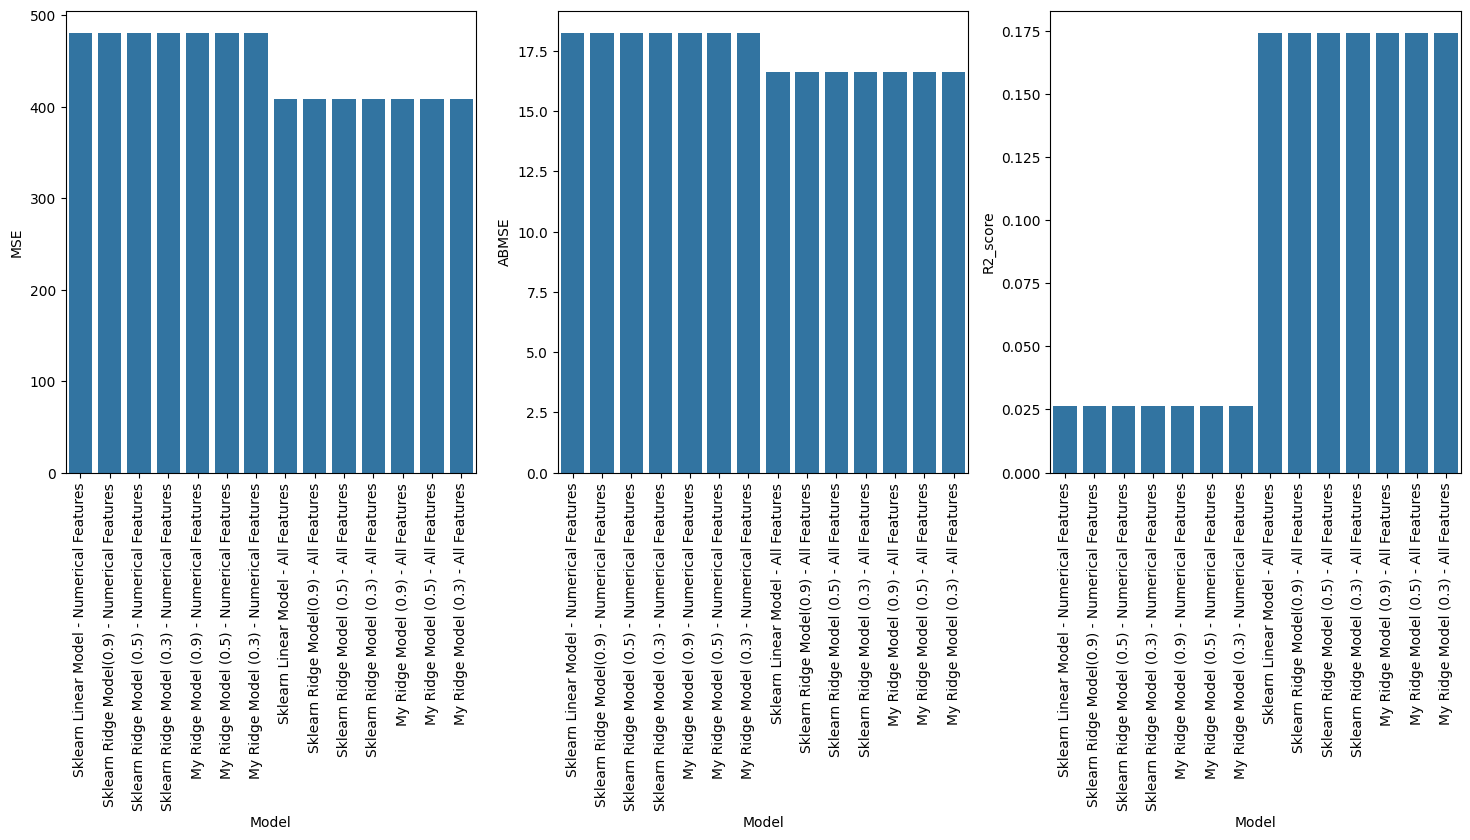

In [62]:
# Plot performance metrics
total_result = pd.concat([numerical_metrics, all_metrics], axis=0)

plt.figure(figsize=(18,6))
for i, metric in enumerate(['MSE', 'ABMSE', 'R2_score'], start=1):
    plt.subplot(1,3,i)
    sns.barplot(x='Model', y=metric, data=total_result)
    plt.xticks(rotation=90)
plt.show()

In [63]:
# Compute statistics with 5-fold cross-validation
def compute_statistics_cv(algoname, model, X, y):
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    mse = -scores.mean()
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
    abmse = -scores.mean()
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    score = scores.mean()
    return algoname, mse, abmse, score

In [64]:
# Compute performance metrics for each model with cross-validation
numerical_results_cv = []
all_results_cv = []
for name, model in models.items():
    numerical_results_cv.append(compute_statistics_cv(f"{name} - Numerical Features", model, X_train_num, y_train_num))
    all_results_cv.append(compute_statistics_cv(f"{name} - All Features", model, X_train_all, y_train_all))

In [65]:
# Convert results to a DataFrame
numerical_metrics_cv = pd.DataFrame(numerical_results_cv, columns=['Model', 'MSE_CV', 'ABMSE_CV', 'R2_score_CV'])
all_metrics_cv = pd.DataFrame(all_results_cv, columns=['Model', 'MSE_CV', 'ABMSE_CV', 'R2_score_CV'])

In [66]:
# Print numerical metrics cv
numerical_metrics_cv

,Model,MSE_CV,ABMSE_CV,R2_score_CV
0,Sklearn Linear Model - Numerical Features,484.596040,18.310879,0.026398
1,Sklearn Ridge Model(0.9) - Numerical Features,484.596036,18.310888,0.026398
2,Sklearn Ridge Model (0.5) - Numerical Features,484.596038,18.310884,0.026398
3,Sklearn Ridge Model (0.3) - Numerical Features,484.596038,18.310882,0.026398
4,My Ridge Model (0.9) - Numerical Features,484.596033,18.310910,0.026398
5,My Ridge Model (0.5) - Numerical Features,484.596036,18.310897,0.026398
6,My Ridge Model (0.3) - Numerical Features,484.596037,18.310890,0.026398


In [67]:
# Print all metrics cv
all_metrics_cv

,Model,MSE_CV,ABMSE_CV,R2_score_CV
0,Sklearn Linear Model - All Features,411.235702,16.669741,0.17381
1,Sklearn Ridge Model(0.9) - All Features,411.235694,16.669762,0.17381
2,Sklearn Ridge Model (0.5) - All Features,411.235698,16.669753,0.17381
3,Sklearn Ridge Model (0.3) - All Features,411.235699,16.669748,0.17381
4,My Ridge Model (0.9) - All Features,411.235697,16.669738,0.17381
5,My Ridge Model (0.5) - All Features,411.235698,16.669739,0.17381
6,My Ridge Model (0.3) - All Features,411.235699,16.669740,0.17381


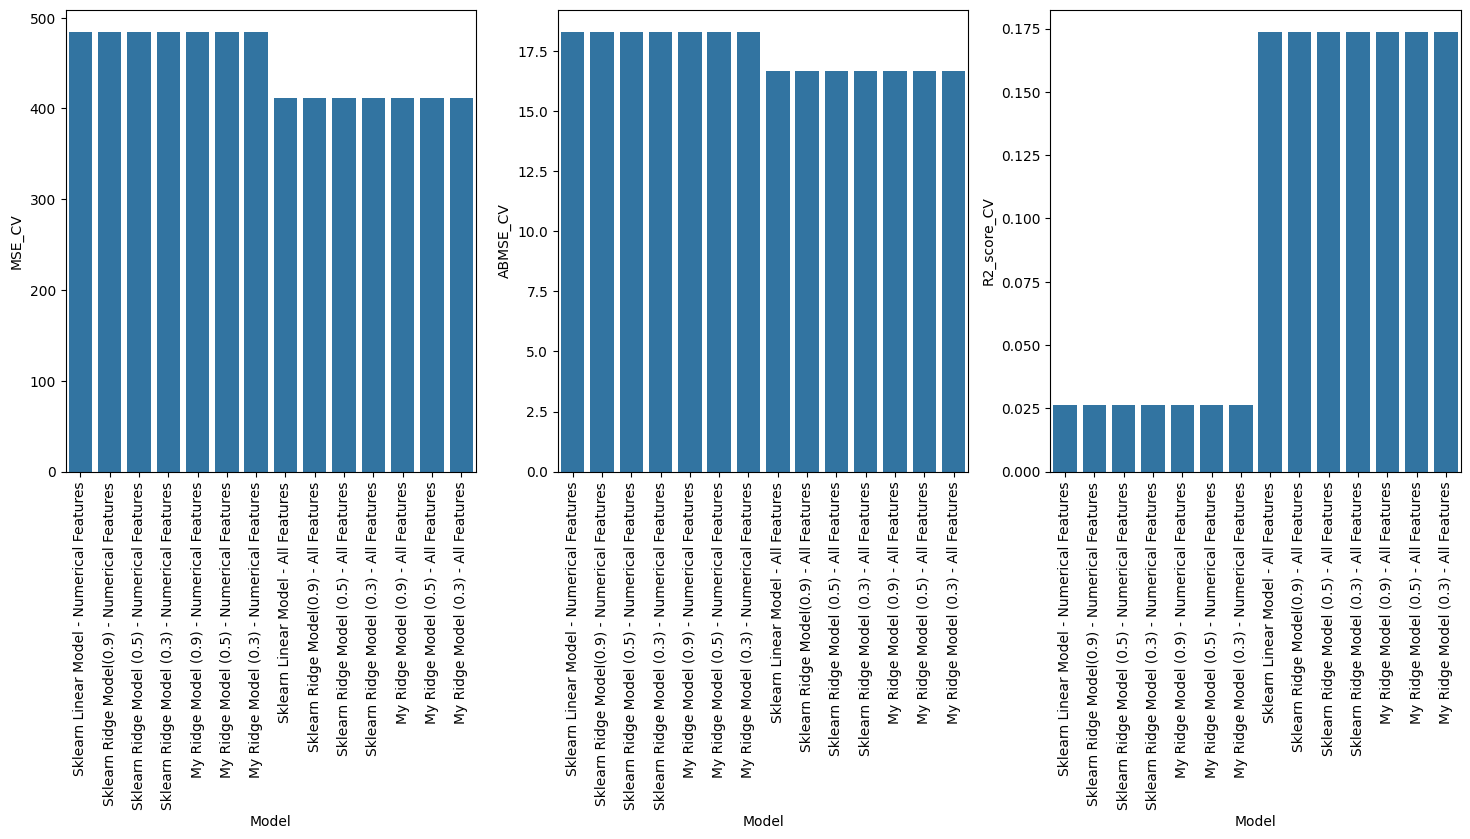

In [68]:
# Plot performance metrics with cross-validation
total_result_cv = pd.concat([numerical_metrics_cv, all_metrics_cv], axis=0)

plt.figure(figsize=(18,6))
for i, metric in enumerate(['MSE_CV', 'ABMSE_CV', 'R2_score_CV'], start=1):
    plt.subplot(1,3,i)
    sns.barplot(x='Model', y=metric, data=total_result_cv)
    plt.xticks(rotation=90)
plt.show()

**Gaussian Kernel Model**

In [69]:
# Initialization my kernel models
my_kernel_models = {
    "My Kernel Ridge Model gamma=0.1, alpha=1.0": KernelRidgeRegressor(gamma=0.1, alpha=1.0), 
    "My Kernel Ridge Model gamma=0.2, alpha=1.0": KernelRidgeRegressor(gamma=0.2, alpha=1.0), 
    "My Kernel Ridge Model gamma=0.3, alpha=1.0": KernelRidgeRegressor(gamma=0.3, alpha=1.0), 
    "My Kernel Ridge Model gamma=0.9, alpha=1.0": KernelRidgeRegressor(gamma=0.9, alpha=1.0),
    "My Kernel Ridge Model gamma=0.1, alpha=0.8": KernelRidgeRegressor(gamma=0.1, alpha=0.8), 
    "My Kernel Ridge Model gamma=0.3, alpha=0.8": KernelRidgeRegressor(gamma=0.3, alpha=0.8), 
    "My Kernel Ridge Model gamma=0.1, alpha=0.5": KernelRidgeRegressor(gamma=0.1, alpha=0.5), 
    "My Kernel Ridge Model gamma=0.3, alpha=0.5": KernelRidgeRegressor(gamma=0.3, alpha=0.5),
}

In [70]:
# Initialization sklearn models
sklearn_kernel_models = {
    "Sklearn Kernel Ridge Model gamma=0.1, alpha=1.0": KernelRidge(kernel='rbf',gamma=0.1, alpha=1.0), 
    "Sklearn Kernel Ridge Model gamma=0.2, alpha=1.0": KernelRidge(kernel='rbf',gamma=0.2, alpha=1.0), 
    "Sklearn Kernel Ridge Model gamma=0.3, alpha=1.0": KernelRidge(kernel='rbf',gamma=0.3, alpha=1.0), 
    "Sklearn Kernel Ridge Model gamma=0.4, alpha=1.0": KernelRidge(kernel='rbf',gamma=0.4, alpha=1.0), 
    "Sklearn Kernel Ridge Model gamma=0.5, alpha=1.0": KernelRidge(kernel='rbf',gamma=0.5, alpha=1.0),
    "Sklearn Kernel Ridge Model gamma=0.1, alpha=0.8": KernelRidge(kernel='rbf',gamma=0.1, alpha=0.8), 
    "Sklearn Kernel Ridge Model gamma=0.3, alpha=0.8": KernelRidge(kernel='rbf',gamma=0.3, alpha=0.8), 
    "Sklearn Kernel Ridge Model gamma=0.1, alpha=0.5": KernelRidge(kernel='rbf',gamma=0.1, alpha=0.5), 
    "Sklearn Kernel Ridge Model gamma=0.3, alpha=0.5": KernelRidge(kernel='rbf',gamma=0.3, alpha=0.5),
}

In [71]:
# Truncate the datasets to the specified size
size = 200

X_train_all_truncated = X_train_all[:size]
y_train_all_truncated = y_train_all[:size]
X_test_all_truncated = X_test_all[:size]
y_test_all_truncated = y_test_all[:size]

X_train_num_truncated = X_train_num[:size]
y_train_num_truncated = y_train_num[:size]
X_test_num_truncated = X_test_num[:size]
y_test_num_truncated = y_test_num[:size]


In [72]:
# Print the shape of truncated X_train dataset
X_train_all_truncated.shape

(200, 32)

In [73]:
# Define function to compute metrics
def reportStatisticsDataframe(models):
    numerical_results = []
    all_results = []
    for name, model in models.items():
        numerical_results.append(compute_statistics(f"{name} - Numerical Features", model, X_train_num_truncated, y_train_num_truncated, X_test_num_truncated, y_test_num_truncated))
        all_results.append(compute_statistics(f"{name} - All Features", model, X_train_all_truncated, y_train_all_truncated, X_test_all_truncated, y_test_all_truncated))

    numerical_metrics = pd.DataFrame(numerical_results, columns=['Model', 'MSE', 'ABMSE', 'R2_score'])
    all_metrics = pd.DataFrame(all_results, columns=['Model', 'MSE', 'ABMSE', 'R2_score'])

    return numerical_metrics, all_metrics

In [74]:
# Compute metrics on sklearn kernel models
sklearn_kernel_numerical_metrics, sklearn_kernel_all_metrics = reportStatisticsDataframe(sklearn_kernel_models)

In [75]:
# Print metrics of sklearn kernel model on numerical dataset
sklearn_kernel_numerical_metrics

,Model,MSE,ABMSE,R2_score
0,"Sklearn Kernel Ridge Model gamma=0.1, alpha=1....",470.364228,17.620581,-0.086215
1,"Sklearn Kernel Ridge Model gamma=0.2, alpha=1....",510.853800,18.860525,-0.179718
2,"Sklearn Kernel Ridge Model gamma=0.3, alpha=1....",602.332787,20.692983,-0.390971
3,"Sklearn Kernel Ridge Model gamma=0.4, alpha=1....",741.629258,23.043122,-0.712649
4,"Sklearn Kernel Ridge Model gamma=0.5, alpha=1....",892.072247,25.230046,-1.060068
5,"Sklearn Kernel Ridge Model gamma=0.1, alpha=0....",479.615061,17.724622,-0.107578
6,"Sklearn Kernel Ridge Model gamma=0.3, alpha=0....",596.107195,20.550013,-0.376594
7,"Sklearn Kernel Ridge Model gamma=0.1, alpha=0....",504.151703,18.060958,-0.164241
8,"Sklearn Kernel Ridge Model gamma=0.3, alpha=0....",591.657403,20.455138,-0.366318


In [76]:
# Print metrics of sklearn kernel model on complete dataset 
sklearn_kernel_all_metrics

,Model,MSE,ABMSE,R2_score
0,"Sklearn Kernel Ridge Model gamma=0.1, alpha=1....",1370.332293,30.620543,-2.164518
1,"Sklearn Kernel Ridge Model gamma=0.2, alpha=1....",1371.808590,30.639638,-2.167927
2,"Sklearn Kernel Ridge Model gamma=0.3, alpha=1....",1371.838920,30.639989,-2.167997
3,"Sklearn Kernel Ridge Model gamma=0.4, alpha=1....",1371.839960,30.640000,-2.167999
4,"Sklearn Kernel Ridge Model gamma=0.5, alpha=1....",1371.839998,30.640000,-2.167999
5,"Sklearn Kernel Ridge Model gamma=0.1, alpha=0....",1370.166285,30.618383,-2.164134
6,"Sklearn Kernel Ridge Model gamma=0.3, alpha=0....",1371.838801,30.639987,-2.167997
7,"Sklearn Kernel Ridge Model gamma=0.1, alpha=0....",1369.835173,30.614064,-2.163370
8,"Sklearn Kernel Ridge Model gamma=0.3, alpha=0....",1371.838561,30.639985,-2.167996


In [77]:
# Compute metrics on my kernel models
my_kenel_numerical_metrics, my_kernel_all_metrics = reportStatisticsDataframe(my_kernel_models)

In [78]:
# Print metrics of my kernel model on numerical dataset
my_kenel_numerical_metrics

,Model,MSE,ABMSE,R2_score
0,"My Kernel Ridge Model gamma=0.1, alpha=1.0 - N...",470.364228,17.620581,-0.086215
1,"My Kernel Ridge Model gamma=0.2, alpha=1.0 - N...",510.853800,18.860525,-0.179718
2,"My Kernel Ridge Model gamma=0.3, alpha=1.0 - N...",602.332787,20.692983,-0.390971
3,"My Kernel Ridge Model gamma=0.9, alpha=1.0 - N...",1242.453860,29.239963,-1.869207
4,"My Kernel Ridge Model gamma=0.1, alpha=0.8 - N...",479.615061,17.724622,-0.107578
5,"My Kernel Ridge Model gamma=0.3, alpha=0.8 - N...",596.107195,20.550013,-0.376594
6,"My Kernel Ridge Model gamma=0.1, alpha=0.5 - N...",504.151703,18.060958,-0.164241
7,"My Kernel Ridge Model gamma=0.3, alpha=0.5 - N...",591.657403,20.455138,-0.366318


In [79]:
# Print metrics of my kernel model on complete dataset
my_kernel_all_metrics

,Model,MSE,ABMSE,R2_score
0,"My Kernel Ridge Model gamma=0.1, alpha=1.0 - A...",1370.332293,30.620543,-2.164518
1,"My Kernel Ridge Model gamma=0.2, alpha=1.0 - A...",1371.808590,30.639638,-2.167927
2,"My Kernel Ridge Model gamma=0.3, alpha=1.0 - A...",1371.838920,30.639989,-2.167997
3,"My Kernel Ridge Model gamma=0.9, alpha=1.0 - A...",1371.840000,30.640000,-2.167999
4,"My Kernel Ridge Model gamma=0.1, alpha=0.8 - A...",1370.166285,30.618383,-2.164134
5,"My Kernel Ridge Model gamma=0.3, alpha=0.8 - A...",1371.838801,30.639987,-2.167997
6,"My Kernel Ridge Model gamma=0.1, alpha=0.5 - A...",1369.835173,30.614064,-2.163370
7,"My Kernel Ridge Model gamma=0.3, alpha=0.5 - A...",1371.838561,30.639985,-2.167996
